In [9]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Data generation 

Only X (3 columns):

In [5]:
def data_gener(n, mu, ro):
    #continious data
    Sigma = np.array([[1, ro, ro], [ro, 1, ro], [ro, ro, 1]])
    X_cont = np.random.multivariate_normal(mu, Sigma, size = n)

    return X_cont

In [6]:
mu_X_1 = np.array([5, 5, 10])
mu_X_2 = np.array([1, 100, 10000])
mu_X_3 = np.array([1, 10000, 100000000])
mu_X_4 = np.array([100, 100, 200])

In [226]:
X_tmp = data_gener_X(100, mu_X_1, cor)
pd.DataFrame(X_tmp, columns = ['Y1', 'Y2', 'X1'])

Y1        Y2         X1
0   6.211401  3.145774  10.419845
1   5.556685  6.139292  10.815454
2   4.550723  3.878627  11.053030
3   3.179645  4.119579   9.235427
4   3.642121  3.697277  10.525564
..       ...       ...        ...
95  4.050570  5.015404   9.051382
96  5.890851  5.724332  10.786963
97  5.536445  4.562547  10.085481
98  4.802070  4.865702   9.323745
99  3.872683  4.763513   9.056037

[100 rows x 3 columns]

X with y (3 + 1 columns):

In [151]:
def data_gener_XXX(n, mu, ro):
    #continious data
    Sigma = np.array([[1, ro, ro, ro], [ro, 1, ro, ro], [ro, ro, 1, ro], [ro, ro, ro, 1]])
    X_cont = np.random.multivariate_normal(mu, Sigma, size = n)
    
    X = X_cont[:, [0, 1, 2]]
    y = X_cont[:,3]

    return X, y

In [152]:
mu1 = np.array([5, 5, 5, 10])
mu4 = np.array([100, 100, 100, 200])

In [99]:
pd.DataFrame(data_gener(100, np.array([5, 5, 5, 10]), 0.3)) 

0         1         2          3
0   6.124398  6.052440  5.100628  11.799923
1   6.086284  3.289983  4.793300   9.888105
2   4.521654  4.161507  5.121476  10.002943
3   3.550429  5.276044  3.849998  10.625650
4   6.999037  6.667277  6.634344  11.668758
..       ...       ...       ...        ...
95  3.559727  4.155728  4.922177   9.027856
96  4.881008  5.822808  5.722924   9.370306
97  4.411984  6.434480  4.318993  10.582134
98  4.800930  3.545514  5.985284   9.978937
99  4.941087  7.268026  5.095924   9.511237

[100 rows x 4 columns]

## CC affecting all variables

графики в этом блоке построены при подсчете среднего после CC по всем строкам

In [ ]:
# mech = "MAR"
# mech+ str(2)

In [36]:
def M_ampute(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M1'] = cc[param].mean() 


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M2'] = cc[param].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M3'] = cc[param].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            df_means.loc[n, 'mean_M4'] = cc[param].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias    

In [39]:
mu = mu2
prop = 0.2

mu2_meanCC_MAR_Y1 = M_ampute(mu = mu, param = "Y1", num = 0, propor = prop, mech = "MAR")
mu2_meanCC_MAR_Y2 = M_ampute(mu = mu, param = "Y2", num = 1, propor = prop, mech = "MAR")
mu2_meanCC_MAR_X1 = M_ampute(mu = mu, param = "X1", num = 2, propor = prop, mech = "MAR")
mu2_meanCC_MNAR_Y1 = M_ampute(mu = mu, param = "Y1", num = 0, propor = prop, mech = "MNAR")
mu2_meanCC_MNAR_Y2 = M_ampute(mu = mu, param = "Y2", num = 1, propor = prop, mech = "MNAR")
mu2_meanCC_MNAR_X1 = M_ampute(mu = mu, param = "X1", num = 2, propor = prop, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

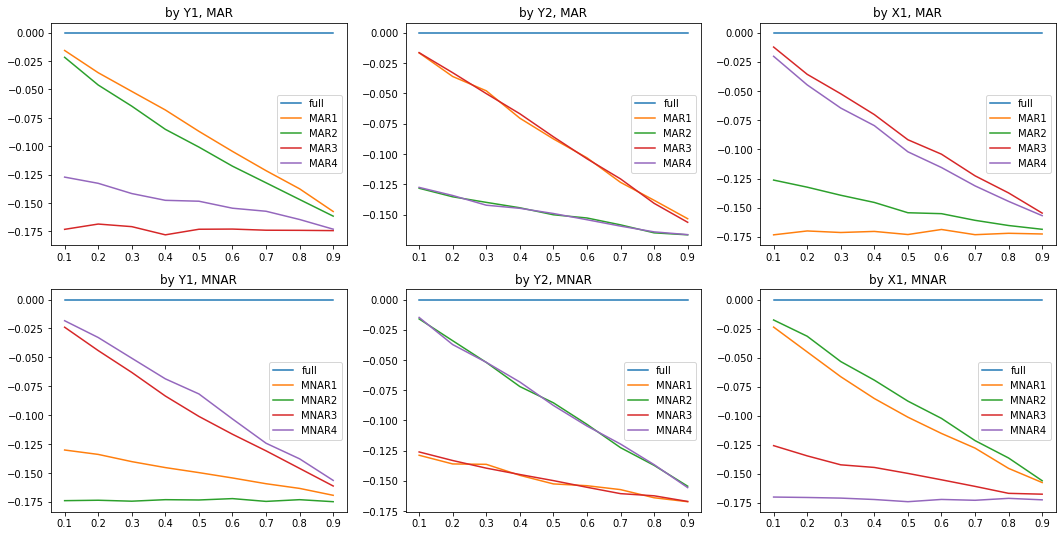

In [40]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_meanCC_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_meanCC_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_meanCC_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_meanCC_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_meanCC_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_meanCC_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

Расшифровка графиков:

График (1.1):
У нижней кривой MAR3 pattern = [1 0 0] => Вклад в потерю данных во 2 и 3 столбцах вносит только Y1. Получаем для всех строк WSS_i = y1_i. Далее выкидывается доля = prop строк с бОльшими wss. Таким образом, при анализе bias при подсчете среднего по Y1 после ампутаций в столбце Y1 потеряются самые большие значения, а значит среднее уменьшится. Так же оно будет ~постоянным не зависимо от cor.

Следующая кривая MAR4 находится чуть выше MAR3, поскольку вклад в wss дает еще и параметр Y2. С ростом cor bias увеличивается, поскольку данные становятся сильносвязанными, а значит при большем Y1 будет большее значение Y2 => будут выкидываться большие значения, и опять среднее будет сильнее отличаться от исходного. 

У кривых MAR1, MAR2 та же ситуация. В этих паттернах потеря не зависит от Y1. Получается, при малых cor с точки зрения Y1 значения теряются в общем то случайно (так как строки выбиваются с бОльшим wss, вклад в который дают Y2, X1), однако при увеличении cor начинают выбиваться и бОльшие значения Y1, поэтому bias и увеличивается.


График (1.2) by Y2:
Паттерна 0 1 0 среди приведенных выше нет, поэтому и нет горизонтальной кривой, как MAR3 на гр.(1). 
MAR2, MAR4 - аналог MAR4 на гр.(1).

MNAR - это те же графики MAR, только при других паттернах. Например, MNAR2 = MAR3, поскольку в wss у MAR3 (1 0 0) вклад вносит только Y1, то же самое происходит при MNAR2 (0 1 1). То есть на потерю необходимых значений влияет только стоблец Y1.

Аналогичным образом MNAR1 = MAR4, MNAR3 = MAR2, MNAR4 = MAR1.

в случае CC $\mu$ не влияет на bias:

In [41]:
mu = mu1
prop = 0.2

mu1_meanCC_MAR_Y1 = M_ampute(mu = mu, param = "Y1", num = 0, propor = prop, mech = "MAR")
mu1_meanCC_MAR_Y2 = M_ampute(mu = mu, param = "Y2", num = 1, propor = prop, mech = "MAR")
mu1_meanCC_MAR_X1 = M_ampute(mu = mu, param = "X1", num = 2, propor = prop, mech = "MAR")
mu1_meanCC_MNAR_Y1 = M_ampute(mu = mu, param = "Y1", num = 0, propor = prop, mech = "MNAR")
mu1_meanCC_MNAR_Y2 = M_ampute(mu = mu, param = "Y2", num = 1, propor = prop, mech = "MNAR")
mu1_meanCC_MNAR_X1 = M_ampute(mu = mu, param = "X1", num = 2, propor = prop, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

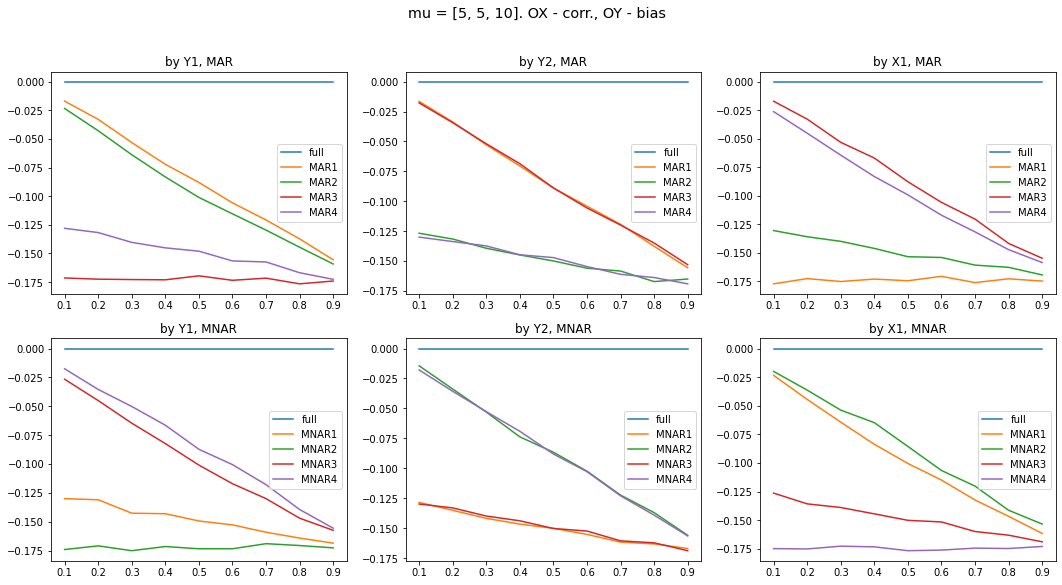

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_meanCC_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_meanCC_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_meanCC_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_meanCC_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_meanCC_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_meanCC_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

### Сomparison prop = 0.2 and prop = 0.4 (no diff)

In [21]:
tmp2_MAR_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.4, mech = "MAR")
tmp2_MAR_Y2 = MAR_ampute(param = "Y2", num = 1, propor = 0.4, mech = "MAR")
tmp2_MAR_X1 = MAR_ampute(param = "X1", num = 2, propor = 0.4, mech = "MAR")

<AxesSubplot:title={'center':'by X1, MAR, prop = 0.4'}>

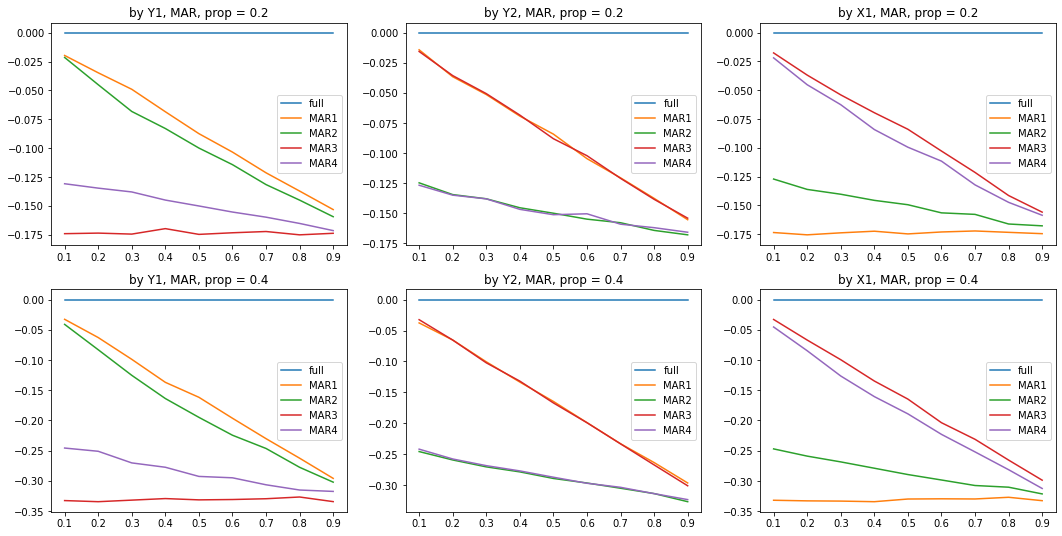

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))
#fig.tight_layout()

tmp_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR, prop = 0.2")
tmp2_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, MAR, prop = 0.4")
tmp_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR, prop = 0.2")
tmp2_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, MAR, prop = 0.4")
tmp_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR, prop = 0.2")
tmp2_MAR_X1.plot(ax = axes[1,2], title = "by X1, MAR, prop = 0.4")

## Mean by column without CC

In [44]:
def mean_withoutCC(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M1'] = X_m[param].mean(axis = 0, skipna = True)



            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M2'] = X_m[param].mean(axis = 0, skipna = True)




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M3'] = X_m[param].mean(axis = 0, skipna = True)



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M4'] = X_m[param].mean(axis = 0, skipna = True)


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [45]:
mu = mu2

mu2_meanNA_MAR_Y1 = mean_withoutCC(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu2_meanNA_MAR_Y2 = mean_withoutCC(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu2_meanNA_MAR_X1 = mean_withoutCC(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu2_meanNA_MNAR_Y1 = mean_withoutCC(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu2_meanNA_MNAR_Y2 = mean_withoutCC(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu2_meanNA_MNAR_X1 = mean_withoutCC(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

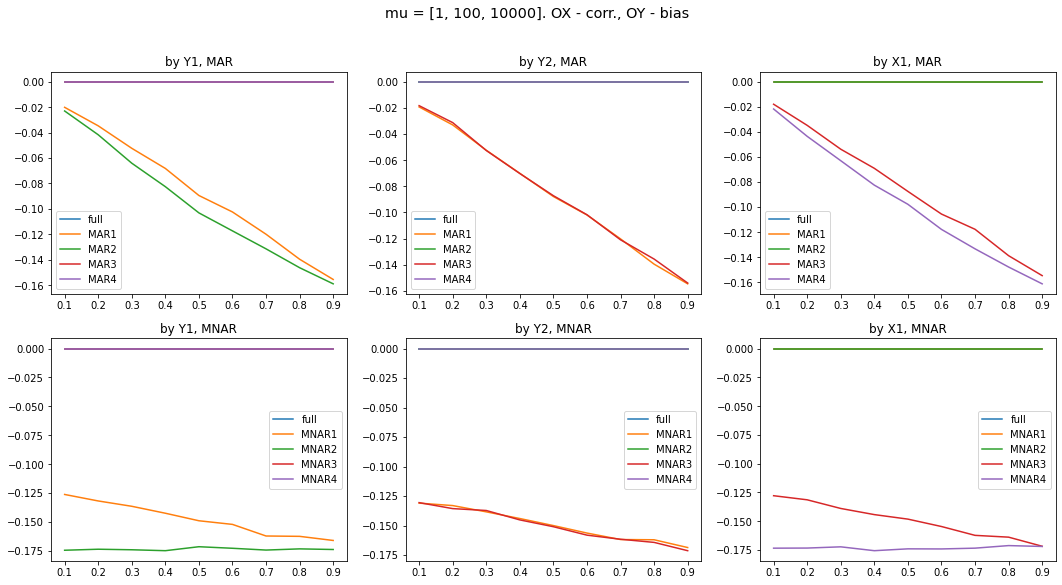

In [46]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_meanNA_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_meanNA_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_meanNA_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_meanNA_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_meanNA_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_meanNA_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

при подсчете mean без учета пропусков $\mu$ не влияет на bias:

In [47]:
mu = mu1

mu1_meanNA_MAR_Y1 = mean_withoutCC(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_meanNA_MAR_Y2 = mean_withoutCC(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_meanNA_MAR_X1 = mean_withoutCC(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_meanNA_MNAR_Y1 = mean_withoutCC(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_meanNA_MNAR_Y2 = mean_withoutCC(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_meanNA_MNAR_X1 = mean_withoutCC(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

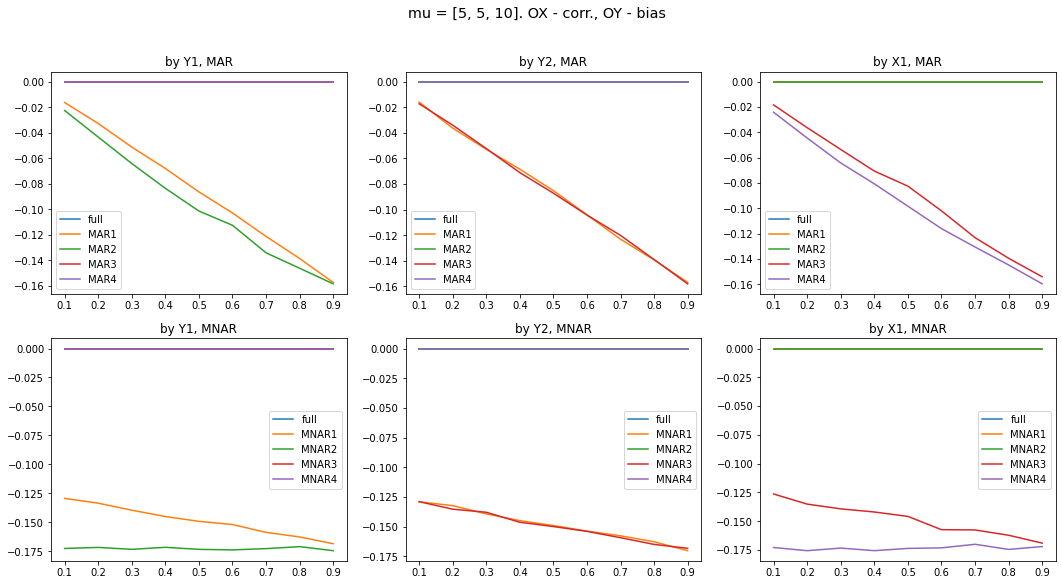

In [48]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_meanNA_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_meanNA_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_meanNA_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_meanNA_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_meanNA_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_meanNA_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

При увеличении prop графики сохраняют вид, меняется только размах bias

## All patterns by MAR

In [31]:
def MAR_ampute_byAll(propor, varss, weights):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['byY1', 'byY2', 'byX1'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_fullY1', 'mean_byY1', 'mean_fullY2', 'mean_byY2', 'mean_fullX1', 'mean_byX1'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor) 

            
            df_means.loc[n, 'mean_fullY1'] = X_full[:,0].mean()
            df_means.loc[n, 'mean_fullY2'] = X_full[:,1].mean()
            df_means.loc[n, 'mean_fullX1'] = X_full[:,2].mean()
        
            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'weights': weights, 'mechanism': "MAR"} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            
            df_means.loc[n, 'mean_byY1'] = cc['Y1'].mean()
            df_means.loc[n, 'mean_byY2'] = cc['Y2'].mean() 
            df_means.loc[n, 'mean_byX1'] = cc['X1'].mean() 

            
 
        df_bias.loc[cor, 'byY1'] = df_means['mean_byY1'].mean() - df_means['mean_fullY1'].mean()
        df_bias.loc[cor, 'byY2'] = df_means['mean_byY2'].mean() - df_means['mean_fullY2'].mean()
        df_bias.loc[cor, 'byX1'] = df_means['mean_byX1'].mean() - df_means['mean_fullX1'].mean()

    return df_bias

With default weights: (later we can play with other weights)

with prop = 0.2

In [32]:
MAR_ampute_001_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,1], weights = [0,0,1])
MAR_ampute_010_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,2], weights = [0,1,0])
MAR_ampute_100_02 = MAR_ampute_byAll(propor = 0.2, varss = [1,2], weights = [1,0,0])
MAR_ampute_011_02 = MAR_ampute_byAll(propor = 0.2, varss = [0], weights = [0,1,1])
MAR_ampute_101_02 = MAR_ampute_byAll(propor = 0.2, varss = [1], weights = [1,0,1])
MAR_ampute_110_02 = MAR_ampute_byAll(propor = 0.2, varss = [2], weights = [1,1,0])

<AxesSubplot:title={'center':'1 1 0, prop = 0.2'}>

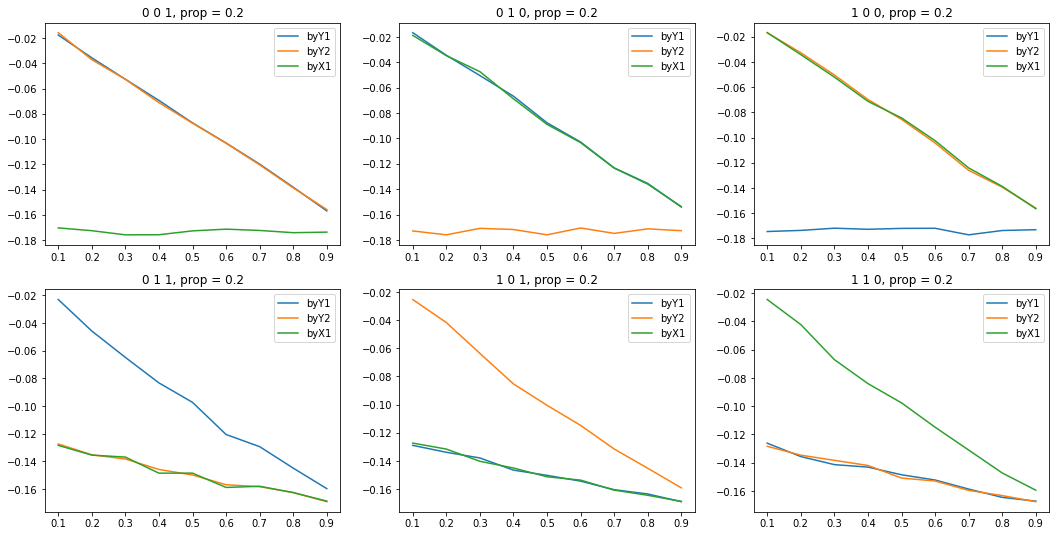

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))

MAR_ampute_001_02.plot(ax = axes[0,0], title = "0 0 1, prop = 0.2")
MAR_ampute_010_02.plot(ax = axes[0,1], title = "0 1 0, prop = 0.2")
MAR_ampute_100_02.plot(ax = axes[0,2], title = "1 0 0, prop = 0.2")
MAR_ampute_011_02.plot(ax = axes[1,0], title = "0 1 1, prop = 0.2")
MAR_ampute_101_02.plot(ax = axes[1,1], title = "1 0 1, prop = 0.2")
MAR_ampute_110_02.plot(ax = axes[1,2], title = "1 1 0, prop = 0.2")

## Few patterns for one ampute

In [5]:
def ampute_fewPatterns(propor, pattern):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['byY1', 'byY2', 'byX1'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_fullY1', 'mean_byY1', 'mean_fullY2', 'mean_byY2', 'mean_fullX1', 'mean_byX1'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor) 
            
            df_means.loc[n, 'mean_fullY1'] = X_full[:,0].mean()
            df_means.loc[n, 'mean_fullY2'] = X_full[:,1].mean()
            df_means.loc[n, 'mean_fullX1'] = X_full[:,2].mean()
        
            ma = MultivariateAmputation(
                patterns = pattern,
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            
            df_means.loc[n, 'mean_byY1'] = cc['Y1'].mean()
            df_means.loc[n, 'mean_byY2'] = cc['Y2'].mean() 
            df_means.loc[n, 'mean_byX1'] = cc['X1'].mean() 

            
 
        df_bias.loc[cor, 'byY1'] = df_means['mean_byY1'].mean() - df_means['mean_fullY1'].mean()
        df_bias.loc[cor, 'byY2'] = df_means['mean_byY2'].mean() - df_means['mean_fullY2'].mean()
        df_bias.loc[cor, 'byX1'] = df_means['mean_byX1'].mean() - df_means['mean_fullX1'].mean()

    return df_bias

In [9]:
MAR11_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"}])

MAR12_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"}])

MAR13_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [1,2], 'mechanism': "MAR"}])

MAR14_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR21_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"}])

MAR22_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR31_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"}])

MAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MNAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

### pattern's combination of MAR, MNAR part 1

у непропущенных параметров считать среднее по всем данным

<AxesSubplot:title={'center':'MNAR1+MNAR2+MNAR3+MNAR4'}>

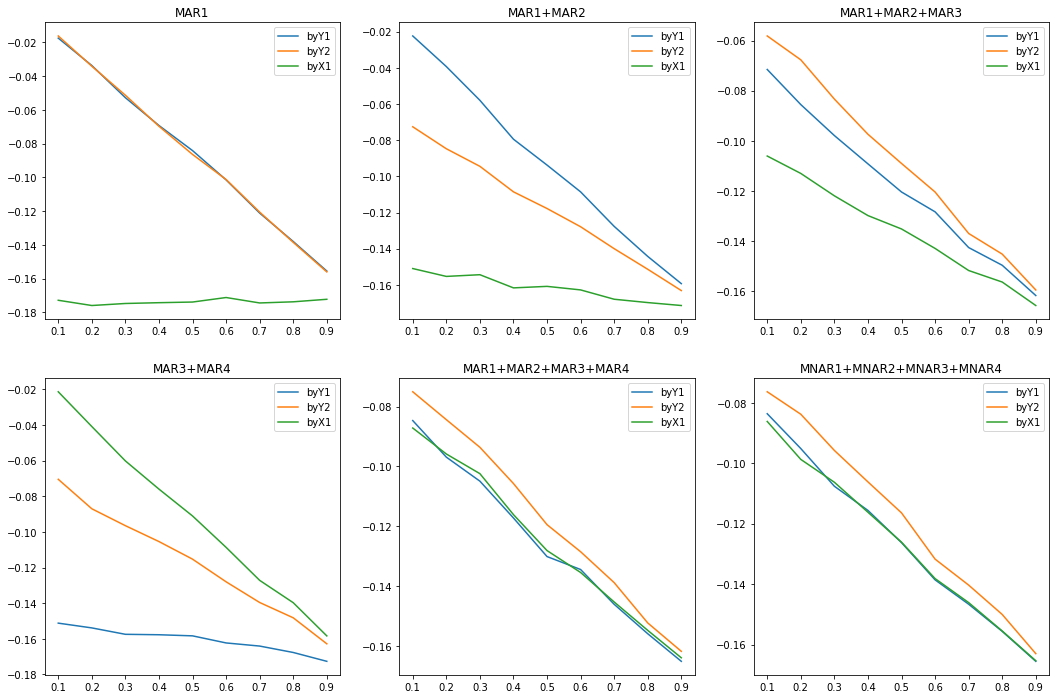

In [98]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,4 * 3))


MAR11_fewPatterns.plot(ax = axes[0,0], title = "MAR1")
MAR21_fewPatterns.plot(ax = axes[0,1], title = "MAR1+MAR2")
MAR31_fewPatterns.plot(ax = axes[0,2], title = "MAR1+MAR2+MAR3")

MAR22_fewPatterns.plot(ax = axes[1,0], title = "MAR3+MAR4")
MAR4_fewPatterns.plot(ax = axes[1,1], title = "MAR1+MAR2+MAR3+MAR4")
MNAR4_fewPatterns.plot(ax = axes[1,2], title = "MNAR1+MNAR2+MNAR3+MNAR4")

# MAR11_fewPatterns.plot(ax = axes[0,0])
# MAR12_fewPatterns.plot(ax = axes[0,0])
# MAR13_fewPatterns.plot(ax = axes[0,0])
# MAR14_fewPatterns.plot(ax = axes[0,0], title = "MAR1, MAR2, MAR3, MAR4")

график MAR1+MAR2+MAR3+MAR4 идентичен графику MNAR1+MNAR2+MNAR3+MNAR4, поскольку паттерны в wss абсолютно одинаковые (однако при разных freq ситуация будет разная)

### pattern's combination of MAR, MNAR part 2

In [13]:
MAR_MNAR1_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR_MNAR2_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR_MNAR3_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

MAR_MNAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

In [20]:
MAR_MNAR5_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

In [44]:
MCAR_MAR_MNAR1_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MCAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

MCAR_MAR_MNAR2_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MCAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MCAR_MAR_MNAR3_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MCAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

### Chart's interpretation

<AxesSubplot:title={'center':'mNAr1+mCar2+mNAr3+mAr4'}>

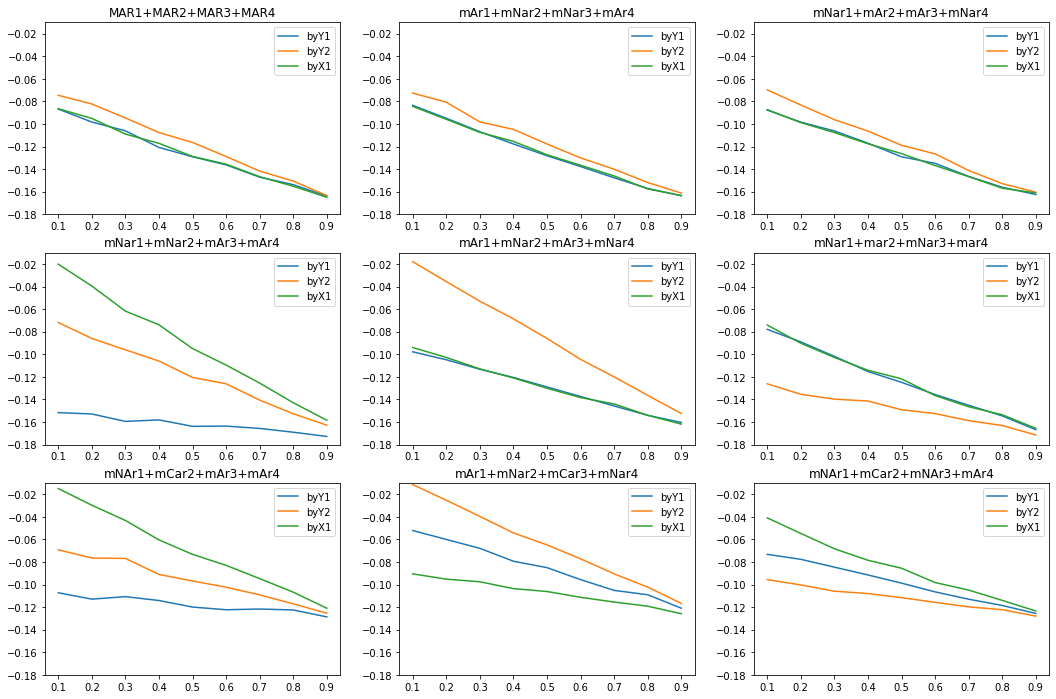

In [45]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(6 * 3,4 * 3))
[ax.set_ylim([-0.18, -0.01]) for ax in axes.flatten()]

MAR4_fewPatterns.plot(ax = axes[0,0], title = "MAR1+MAR2+MAR3+MAR4")
MAR_MNAR1_fewPatterns.plot(ax = axes[0,1], title = "mAr1+mNar2+mNar3+mAr4")
MAR_MNAR4_fewPatterns.plot(ax = axes[0,2], title = "mNar1+mAr2+mAr3+mNar4")

MAR_MNAR2_fewPatterns.plot(ax = axes[1,0], title = "mNar1+mNar2+mAr3+mAr4")
MAR_MNAR3_fewPatterns.plot(ax = axes[1,1], title = "mAr1+mNar2+mAr3+mNar4")
MAR_MNAR5_fewPatterns.plot(ax = axes[1,2], title = "mNar1+mar2+mNar3+mar4")

MCAR_MAR_MNAR2_fewPatterns.plot(ax = axes[2,0], title = "mNAr1+mCar2+mAr3+mAr4")
MCAR_MAR_MNAR1_fewPatterns.plot(ax = axes[2,1], title = "mAr1+mNar2+mCar3+mNar4")
MCAR_MAR_MNAR3_fewPatterns.plot(ax = axes[2,2], title = "mNAr1+mCar2+mNAr3+mAr4")

1ый (MAR1+MAR2+MAR3+MAR4) и 2ой (mAr1+mNar2+mNar3+mAr4) и 3ий! графики имеют одинаковую структуру, поскольку wss_MAR2+MAR3 = wss_MNAR2+MNAR3

График (1,0) (mNar1+mNar2+mAr3+mAr4) имеет аналог (mar1+mar2+mnar3+mnar4)

# Linear Regression imputation

## with initial random imp

Random imputation of missing values in one parameter:

In [352]:
X_full = data_gener_X(1000, mu_X_2, 0.4)
mean_Y1 = X_full[:,0].mean() 

#___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
missing_columns = ['Y1', 'Y2']

ma = MultivariateAmputation(
    patterns = [ {'incomplete_vars': [0,1], 'mechanism': 'MAR'} ],
    prop = 0.2
)

X_miss = ma.fit_transform(X_full)
X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

df = pd.DataFrame()

In [353]:
X_m

Y1          Y2            X1
0    0.959086   98.865153   9998.992714
1    1.765770  100.947679  10002.728093
2    0.814708  101.535891  10001.963826
3   -0.384707   99.735088  10000.173012
4   -0.198662   99.294386   9999.268526
..        ...         ...           ...
995       NaN         NaN   9999.510952
996       NaN         NaN  10000.541632
997       NaN         NaN  10002.335704
998 -0.145047   98.772504  10000.319488
999  0.157506   99.438403  10000.252206

[1000 rows x 3 columns]

Изначальное заполнение пропусков - случайное!

In [354]:
def random_imputation(df, feature):
    
    df[feature + '_imp'] = df[feature]
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

Random imp for all mis values:

In [355]:
for feature in missing_columns:
    df = random_imputation(X_m, feature)

In [356]:
df

Y1          Y2            X1    Y1_imp      Y2_imp
0    0.959086   98.865153   9998.992714  0.959086   98.865153
1    1.765770  100.947679  10002.728093  1.765770  100.947679
2    0.814708  101.535891  10001.963826  0.814708  101.535891
3   -0.384707   99.735088  10000.173012 -0.384707   99.735088
4   -0.198662   99.294386   9999.268526 -0.198662   99.294386
..        ...         ...           ...       ...         ...
995       NaN         NaN   9999.510952  2.333436   99.867548
996       NaN         NaN  10000.541632  1.905324   99.319455
997       NaN         NaN  10002.335704  1.687196   98.555533
998 -0.145047   98.772504  10000.319488 -0.145047   98.772504
999  0.157506   99.438403  10000.252206  0.157506   99.438403

[1000 rows x 5 columns]

In [369]:
def regr_imp(df, missing_columns):
    for feature in missing_columns:

        parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

        #Create a Linear Regression model to estimate the missing data
        model = linear_model.LinearRegression()
        model.fit(X = df[parameters], y = df[feature + '_imp'])

        #observe that I preserve the index of the missing data from the original dataframe
        df.loc[df[feature].isnull(), feature] = model.predict(df[parameters])[df[feature].isnull()]
    return df

In [370]:
df = regr_imp(df, missing_columns)
df

Y1          Y2            X1    Y1_imp      Y2_imp
0    0.959086   98.865153   9998.992714  0.959086   98.865153
1    1.765770  100.947679  10002.728093  1.765770  100.947679
2    0.814708  101.535891  10001.963826  0.814708  101.535891
3   -0.384707   99.735088  10000.173012 -0.384707   99.735088
4   -0.198662   99.294386   9999.268526 -0.198662   99.294386
..        ...         ...           ...       ...         ...
995  0.744389  100.244369   9999.510952  2.333436   99.867548
996  0.793477  100.313866  10000.541632  1.905324   99.319455
997  0.934467  100.588344  10002.335704  1.687196   98.555533
998 -0.145047   98.772504  10000.319488 -0.145047   98.772504
999  0.157506   99.438403  10000.252206  0.157506   99.438403

[1000 rows x 5 columns]

All in one function:

In [19]:
def regr_func(df, missing_columns):
    
    #firstly we randomly (by param) impute missing values in feature + '_imp'
    for feature in missing_columns:
        #extra column for imputations
        df[feature + '_imp'] = df[feature]
        number_missing = df[feature].isnull().sum()
        observed_values = df.loc[df[feature].notnull(), feature]
        df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)


    for feature in missing_columns:
        
        #all params withous missing values
        parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

        #a Linear Regression model
        model = linear_model.LinearRegression()
        model.fit(X = df[parameters], y = df[feature + '_imp'])

        #preserve the index of the missing data from the original dataframe
        df.loc[df[feature].isnull(), feature] = model.predict(df[parameters])[df[feature].isnull()]

    return df

In [20]:
def linregr_imp(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

#             X_full = data_gener_X(100, mu, cor)
#             df_means.loc[n, 'mean_full'] = X_full[:,num].mean()          
            
            dt_gener = data_gener(1000, mu, cor)
            DF_dt_gener = pd.DataFrame(dt_gener, columns = ['Y1','Y2','X1'])
            X_full = StandardScaler().fit_transform(DF_dt_gener)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
            missing_columns = ["Y1", "Y2"]
            
            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M1'] = imp[param].mean()
            
            
                               
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]
            missing_columns = ["Y1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
                
            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M2'] = imp[param].mean()


                               

            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]
            missing_columns = ["Y2", "X1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])


            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M3'] = imp[param].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]
            missing_columns = ["X1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

   
            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M4'] = imp[param].mean()
                               
                               


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [51]:
mu = mu2

mu2_regr_MAR_Y1 = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu2_regr_MAR_Y2 = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu2_regr_MAR_X1 = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu2_regr_MNAR_Y1 = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu2_regr_MNAR_Y2 = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu2_regr_MNAR_X1 = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

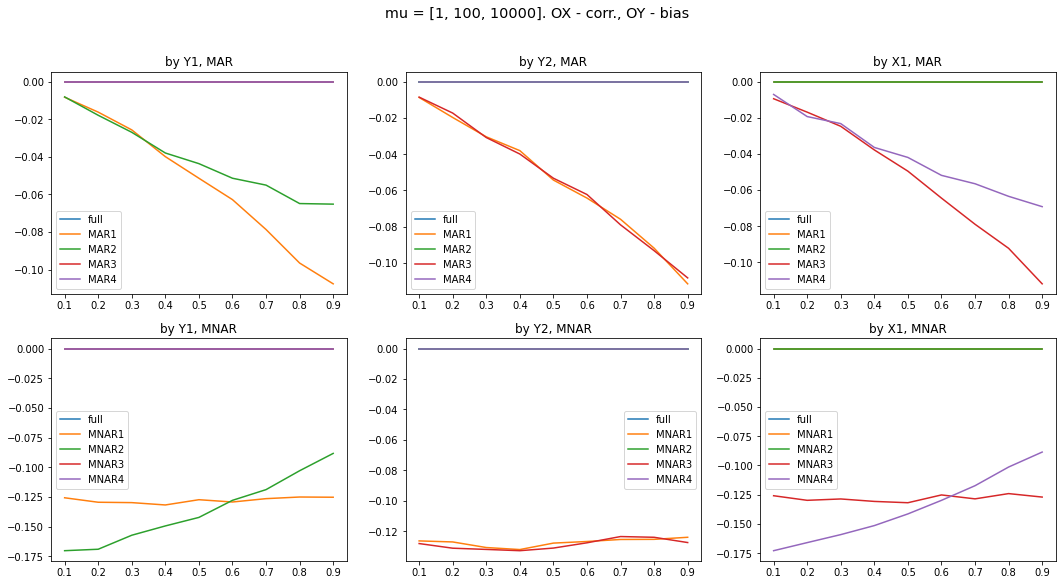

In [52]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_regr_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_regr_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_regr_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_regr_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_regr_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_regr_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [21]:
%%time
mu = mu_X_1

mu1_regr_MAR_Y1_scaled = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_regr_MAR_Y2_scaled = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_regr_MAR_X1_scaled = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_regr_MNAR_Y1_scaled = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_regr_MNAR_Y2_scaled = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_regr_MNAR_X1_scaled = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

CPU times: user 3min 56s, sys: 1.68 s, total: 3min 57s
Wall time: 3min 58s


<AxesSubplot:title={'center':'by X1, MNAR'}>

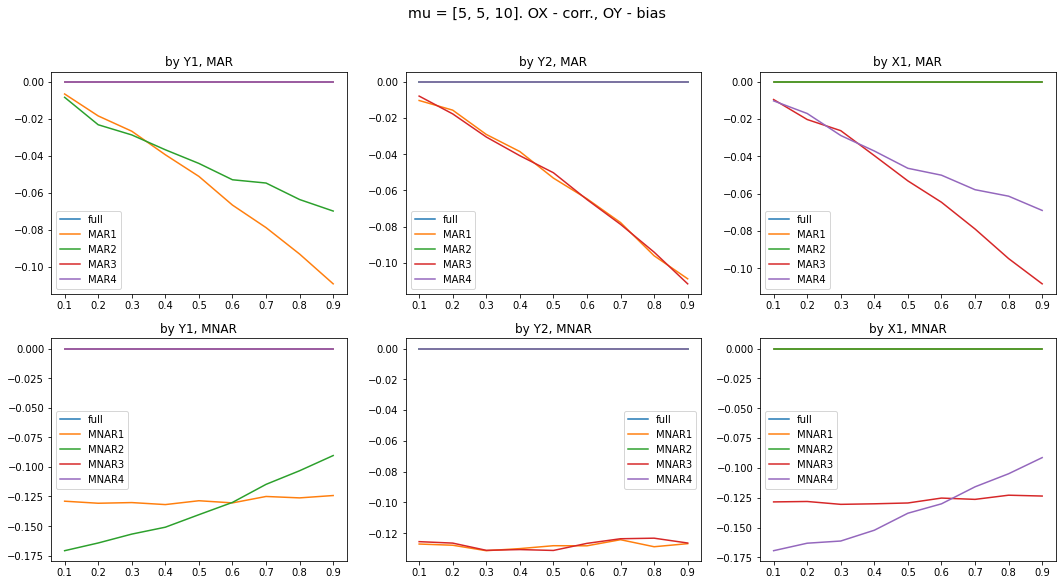

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_regr_MAR_Y1_scaled.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_regr_MNAR_Y1_scaled.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_regr_MAR_Y2_scaled.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_regr_MNAR_Y2_scaled.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_regr_MAR_X1_scaled.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_regr_MNAR_X1_scaled.plot(ax = axes[1,2], title = "by X1, MNAR")

при заполнении регрессией $\mu$ не влияет на bias:

In [53]:
mu = mu1

mu1_regr_MAR_Y1 = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_regr_MAR_Y2 = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_regr_MAR_X1 = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_regr_MNAR_Y1 = linregr_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_regr_MNAR_Y2 = linregr_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_regr_MNAR_X1 = linregr_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

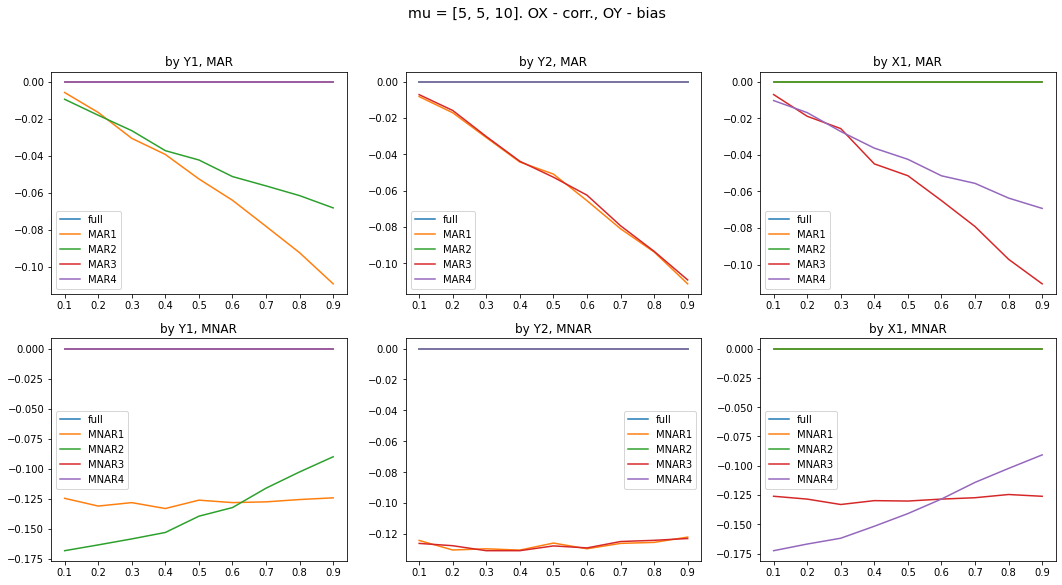

In [54]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_regr_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_regr_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_regr_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_regr_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_regr_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_regr_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

## LinRegr on CC

In [296]:
X_full = data_gener_X(1000, mu_X_2, 0.4)
mean_Y1 = X_full[:,0].mean() 

#___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
missing_columns = ['Y1', 'Y2']

ma = MultivariateAmputation(
    patterns = [ {'incomplete_vars': [0,1], 'mechanism': 'MAR'} ],
    prop = 0.2
)

X_miss = ma.fit_transform(X_full)
X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

df = pd.DataFrame()

In [297]:
X_m

Y1          Y2            X1
0    0.026709   98.849616  10000.125723
1         NaN         NaN  10000.403800
2   -0.397225   99.677459  10000.382120
3   -0.562003   99.388040   9997.646221
4         NaN         NaN   9999.788261
..        ...         ...           ...
995  0.366740  100.043324  10000.677172
996  0.603590   99.006518  10000.327260
997  1.320552   99.578419   9999.195132
998  0.515038   99.510308  10001.669531
999  2.094614   99.899167   9999.769084

[1000 rows x 3 columns]

In [298]:
X_m_CC = X_m.dropna()
X_m_CC

Y1          Y2            X1
0    0.026709   98.849616  10000.125723
2   -0.397225   99.677459  10000.382120
3   -0.562003   99.388040   9997.646221
6    0.423034   98.888667  10000.099610
7    1.543694   98.853926   9999.519518
..        ...         ...           ...
995  0.366740  100.043324  10000.677172
996  0.603590   99.006518  10000.327260
997  1.320552   99.578419   9999.195132
998  0.515038   99.510308  10001.669531
999  2.094614   99.899167   9999.769084

[801 rows x 3 columns]

In [305]:
def regr_CC_imp(X_m, X_m_CC, missing_columns):
    for feature in missing_columns:

        parameters = list(set(X_m.columns) - {feature})

        #Create a Linear Regression model to estimate the missing data
        model = linear_model.LinearRegression()
        model.fit(X = X_m_CC[parameters], y = X_m_CC[feature])

        #observe that I preserve the index of the missing data from the original dataframe
#         print(X_m.loc[X_m[feature].isnull(), feature].shape)
        X_m.loc[X_m[feature].isnull(), feature] = model.predict(X_m_CC[parameters])[X_m[feature].isnull()]
    return X_m

In [306]:
tmp = regr_CC_imp(X_m, X_m_CC, missing_columns)
tmp

IndexError: boolean index did not match indexed array along dimension 0; dimension is 801 but corresponding boolean dimension is 1000

# ICE imputation

## with estimator = BayesianRidge

In [10]:
def ice_imp(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

#             X_full = data_gener_X(100, mu, cor)
#             df_means.loc[n, 'mean_full'] = X_full[:,num].mean()          
            
            dt_gener = data_gener(1000, mu, cor)
            DF_dt_gener = pd.DataFrame(dt_gener, columns = ['Y1','Y2','X1'])
            X_full = StandardScaler().fit_transform(DF_dt_gener)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

New results with data scaling:

In [13]:
%%time
mu = mu_X_1

mu1_ice_MAR_Y1_100_1000 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_ice_MAR_Y2_100_1000 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_ice_MAR_X1_100_1000 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_ice_MNAR_Y1_100_1000 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_ice_MNAR_Y2_100_1000 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_ice_MNAR_X1_100_1000 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

CPU times: user 26min 48s, sys: 5.41 s, total: 26min 53s
Wall time: 36min 17s


<AxesSubplot:title={'center':'by X1, MNAR'}>

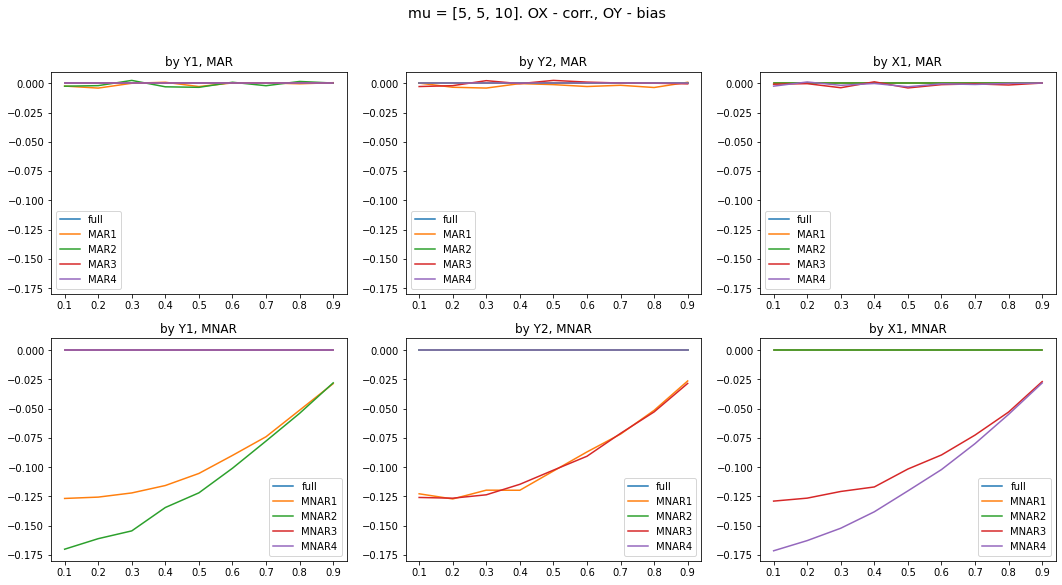

In [15]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_ice_MAR_Y1_100_1000.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_ice_MNAR_Y1_100_1000.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_ice_MAR_Y2_100_1000.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_ice_MNAR_Y2_100_1000.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_ice_MAR_X1_100_1000.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_ice_MNAR_X1_100_1000.plot(ax = axes[1,2], title = "by X1, MNAR")

In [11]:
%%time
mu = mu_X_2

mu2_ice_MAR_Y1_100_1000 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu2_ice_MAR_Y2_100_1000 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu2_ice_MAR_X1_100_1000 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu2_ice_MNAR_Y1_100_1000 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu2_ice_MNAR_Y2_100_1000 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu2_ice_MNAR_X1_100_1000 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

CPU times: user 26min 7s, sys: 6.91 s, total: 26min 14s
Wall time: 26min 16s


<AxesSubplot:title={'center':'by X1, MNAR'}>

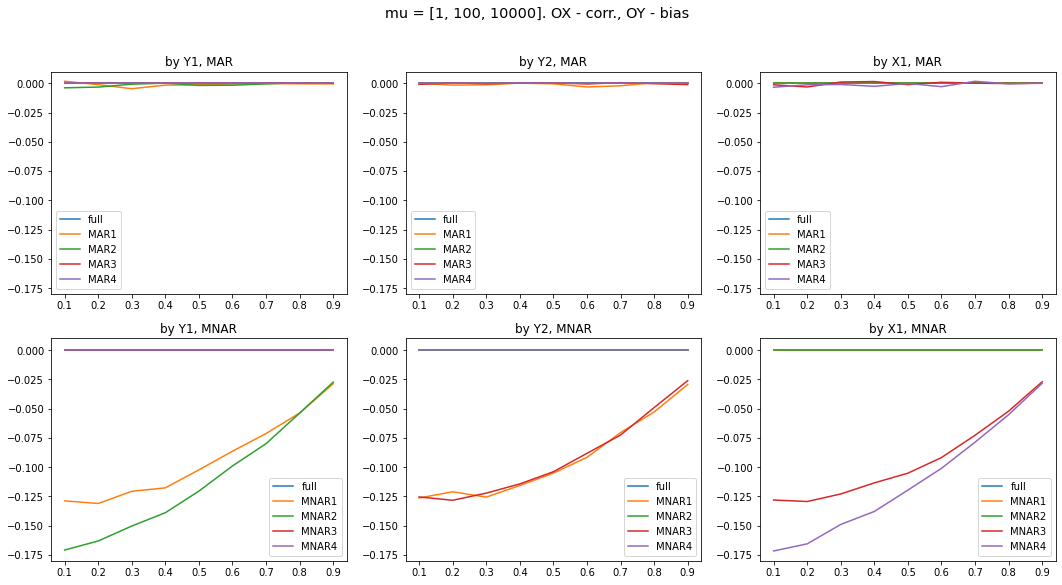

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_ice_MAR_Y1_100_1000.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_ice_MNAR_Y1_100_1000.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_ice_MAR_Y2_100_1000.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_ice_MNAR_Y2_100_1000.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_ice_MAR_X1_100_1000.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_ice_MNAR_X1_100_1000.plot(ax = axes[1,2], title = "by X1, MNAR")

cycle of 100:

In [34]:
mu = mu_X_3

mu3_ice_MAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu3_ice_MAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu3_ice_MAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu3_ice_MNAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MAR'}>

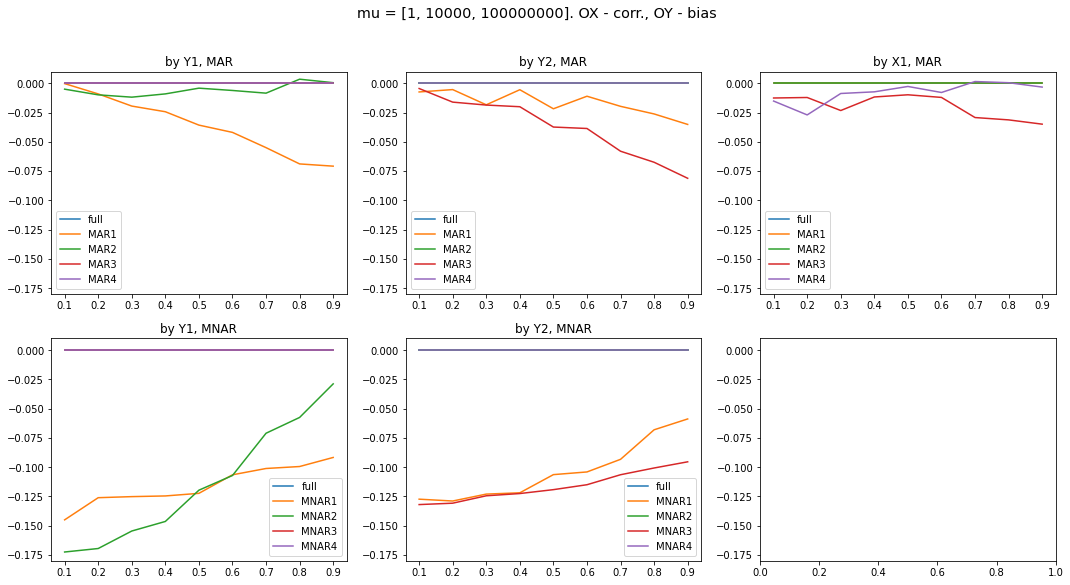

In [36]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_ice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_ice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_ice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_ice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_ice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_ice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

cycle of 1000:

In [61]:
mu = mu3

mu3_ice_MAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu3_ice_MAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu3_ice_MAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu3_ice_MNAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

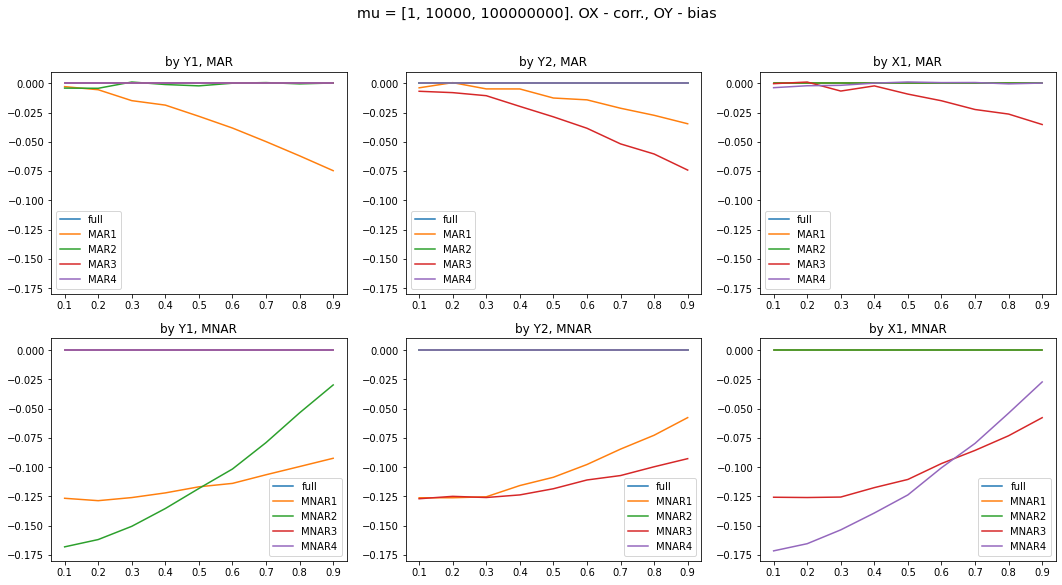

In [62]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_ice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_ice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_ice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_ice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_ice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_ice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [358]:
ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")

mean_full   mean_M1   mean_M2   mean_M3   mean_M4
0   1.118746  0.989037   1.14941  1.118746  1.118746
1   1.013177  0.906193   0.99209  1.013177  1.013177
2    1.10421  1.031502  1.127152   1.10421   1.10421
3    1.09111  1.015788  1.112233   1.09111   1.09111
4   1.034554  0.967457  1.039401  1.034554  1.034554
..       ...       ...       ...       ...       ...
95   0.90261  0.856205  0.886902   0.90261   0.90261
96  0.940679  0.905781  0.934574  0.940679  0.940679
97   0.97564  0.888509  0.957911   0.97564   0.97564
98   0.88569  0.823125  0.929221   0.88569   0.88569
99  0.929287  0.882009  0.930665  0.929287  0.929287

[100 rows x 5 columns]

In [308]:
%%time
mu = mu2

mu2_ice_MAR_Y1_100_100 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu2_ice_MAR_Y2_100_100 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu2_ice_MAR_X1_100_100 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu2_ice_MNAR_Y1_100_100 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu2_ice_MNAR_Y2_100_100 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu2_ice_MNAR_X1_100_100 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

CPU times: user 2min 11s, sys: 1.86 s, total: 2min 13s
Wall time: 2min 13s


<AxesSubplot:title={'center':'by X1, MNAR'}>

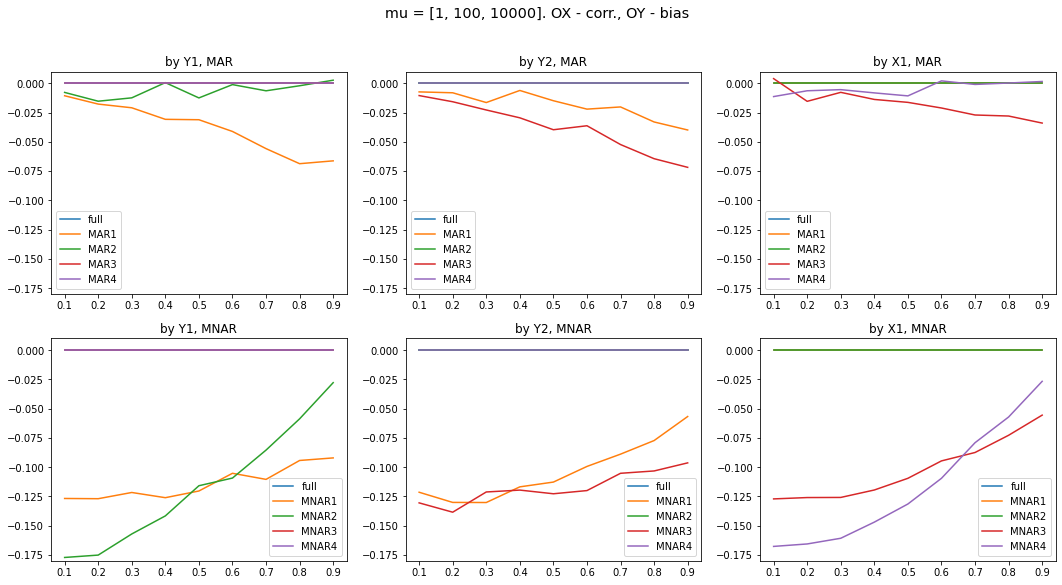

In [309]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_ice_MAR_Y1_100_100.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_ice_MNAR_Y1_100_100.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_ice_MAR_Y2_100_100.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_ice_MNAR_Y2_100_100.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_ice_MAR_X1_100_100.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_ice_MNAR_X1_100_100.plot(ax = axes[1,2], title = "by X1, MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

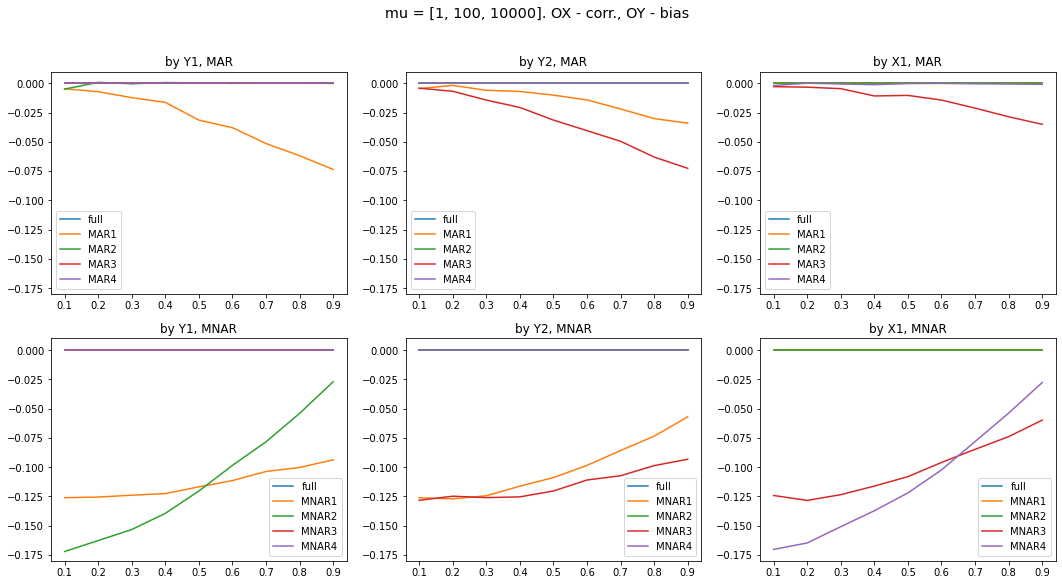

In [57]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias", fontsize="x-large")

mu2_ice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_ice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_ice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_ice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_ice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_ice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

- On chart 1.1 mice shows good results in case MAR2, cause only one parametr has missing values;
Worse situation with MAR1, here we have 2/3 missing value, so with increasing prop it becomes harder to predict the missing values (but still small bias value).

- Not clear why on chart 1.2 plots of MAR1 and MAR3 have different appearance. Both of it has one mis values (Y1 or X1). Probably because of mu.

In [58]:
mu = mu1

mu1_ice_MAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_ice_MAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_ice_MAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_ice_MNAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_ice_MNAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_ice_MNAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

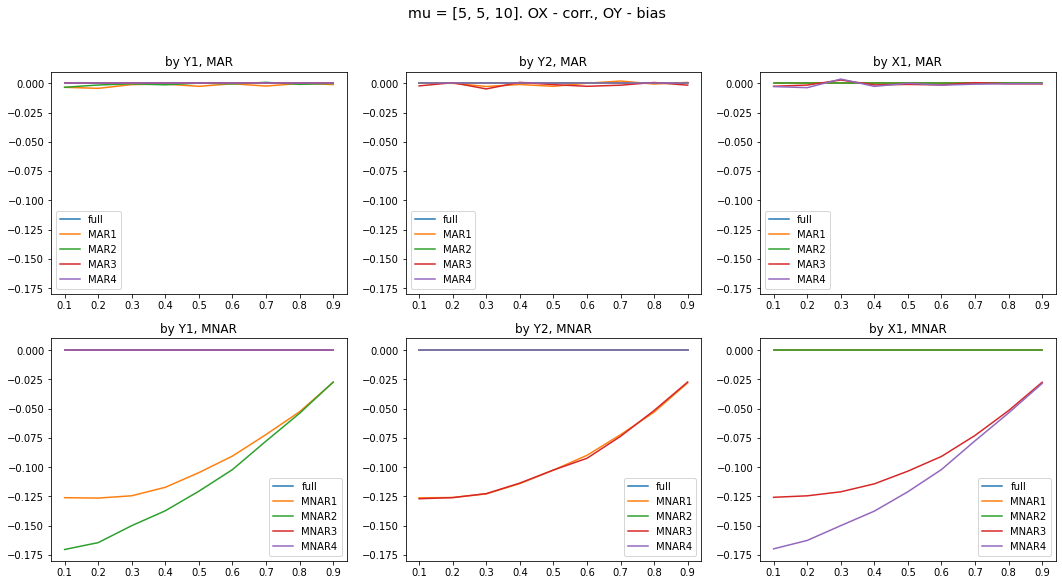

In [59]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias", fontsize="x-large")

mu1_ice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_ice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_ice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_ice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_ice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_ice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [64]:
mu = mu4

mu4_ice_MAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu4_ice_MAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu4_ice_MAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu4_ice_MNAR_Y1 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu4_ice_MNAR_Y2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu4_ice_MNAR_X1 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

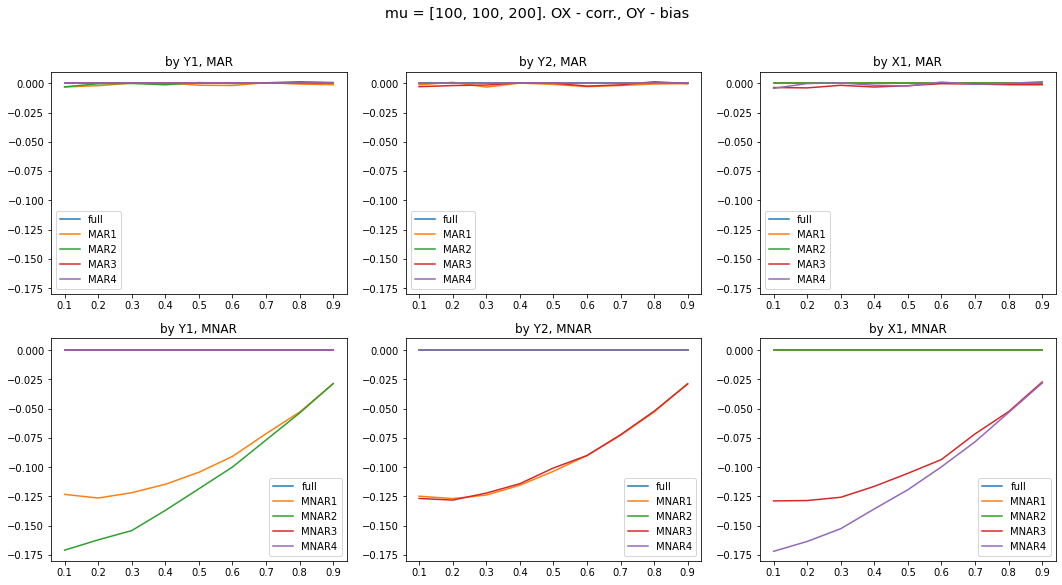

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [100, 100, 200]. OX - corr., OY - bias", fontsize="x-large")

mu4_ice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu4_ice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu4_ice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu4_ice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu4_ice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu4_ice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

### withous max_iter (no difference, перепроверить)

In [179]:
def ice_imp(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener_X(100, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [180]:
mu = mu_X_3

mu3_ice_MAR_Y1_2 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu3_ice_MAR_Y2_2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu3_ice_MAR_X1_2 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu3_ice_MNAR_Y1_2 = ice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_Y2_2 = ice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu3_ice_MNAR_X1_2 = ice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

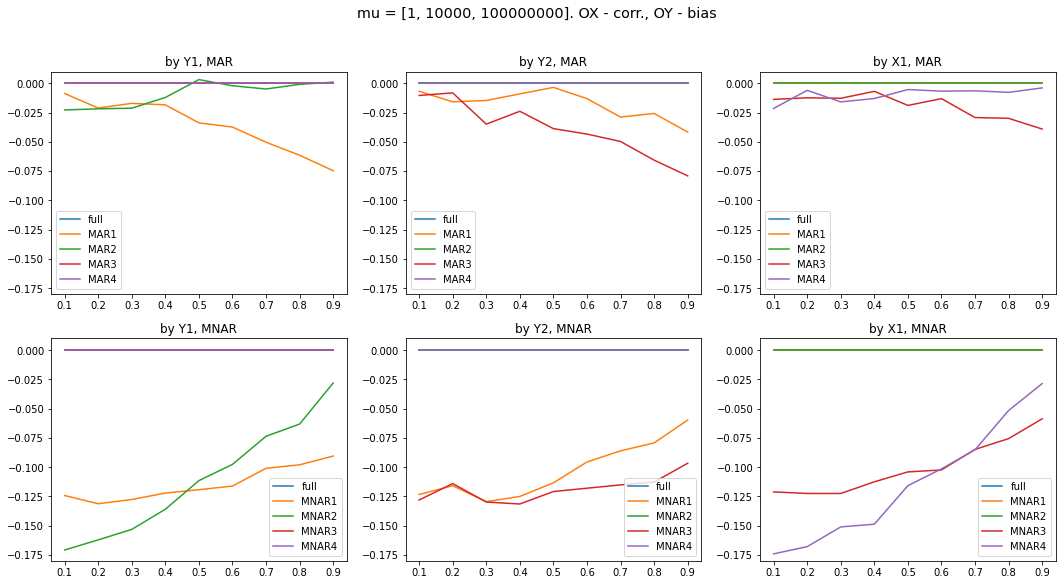

In [181]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_ice_MAR_Y1_2.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_ice_MNAR_Y1_2.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_ice_MAR_Y2_2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_ice_MNAR_Y2_2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_ice_MAR_X1_2.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_ice_MNAR_X1_2.plot(ax = axes[1,2], title = "by X1, MNAR")

## with estimator = LinearRegression (not possible)!

нужен return_std!!!

In [367]:
def ice_imp_lr(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener_X(1000, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = LinearRegression()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = LinearRegression()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = LinearRegression()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = LinearRegression()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [368]:
%%time
mu = mu_X_3

mu3_icelr_MAR_Y1_100_1000 = ice_imp_lr(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu3_icelr_MAR_Y2_100_1000 = ice_imp_lr(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu3_icelr_MAR_X1_100_1000 = ice_imp_lr(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu3_icelr_MNAR_Y1_100_1000 = ice_imp_lr(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu3_icelr_MNAR_Y2_100_1000 = ice_imp_lr(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu3_icelr_MNAR_X1_100_1000 = ice_imp_lr(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

KeyboardInterrupt: 

<AxesSubplot:title={'center':'by X1, MNAR'}>

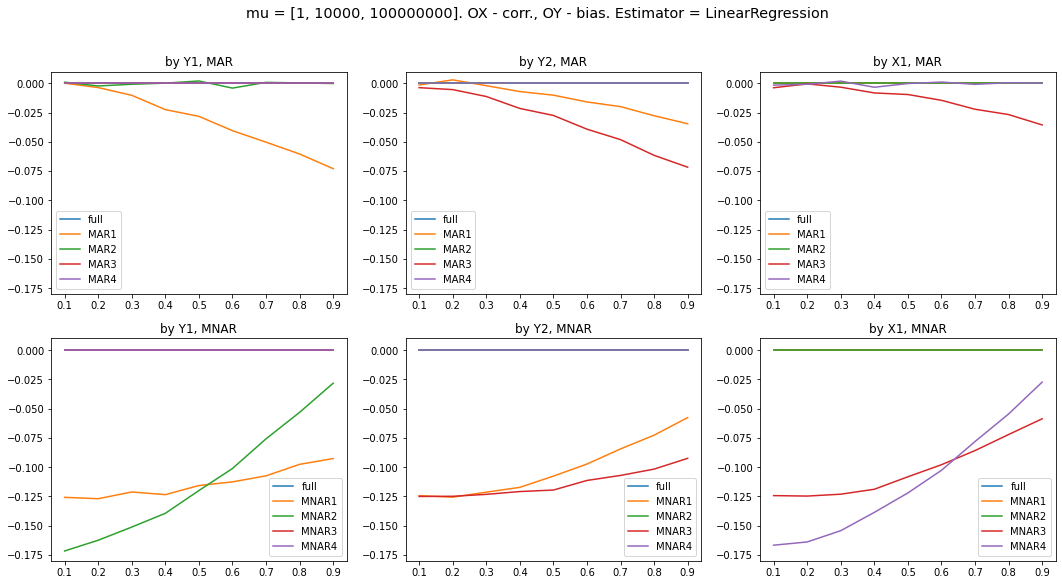

In [366]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias. Estimator = LinearRegression", fontsize="x-large")

mu3_icelr_MAR_Y1_100_1000.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_icelr_MNAR_Y1_100_1000.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_icelr_MAR_Y2_100_1000.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_icelr_MNAR_Y2_100_1000.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_icelr_MAR_X1_100_1000.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_icelr_MNAR_X1_100_1000.plot(ax = axes[1,2], title = "by X1, MNAR")

In [363]:
%%time
mu = mu_X_1

mu1_icelr_MAR_Y1_100_1000 = ice_imp_lr(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu1_icelr_MAR_Y2_100_1000 = ice_imp_lr(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu1_icelr_MAR_X1_100_1000 = ice_imp_lr(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
mu1_icelr_MNAR_Y1_100_1000 = ice_imp_lr(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mu1_icelr_MNAR_Y2_100_1000 = ice_imp_lr(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mu1_icelr_MNAR_X1_100_1000 = ice_imp_lr(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

CPU times: user 4min 42s, sys: 2.45 s, total: 4min 45s
Wall time: 4min 45s


<AxesSubplot:title={'center':'by X1, MNAR'}>

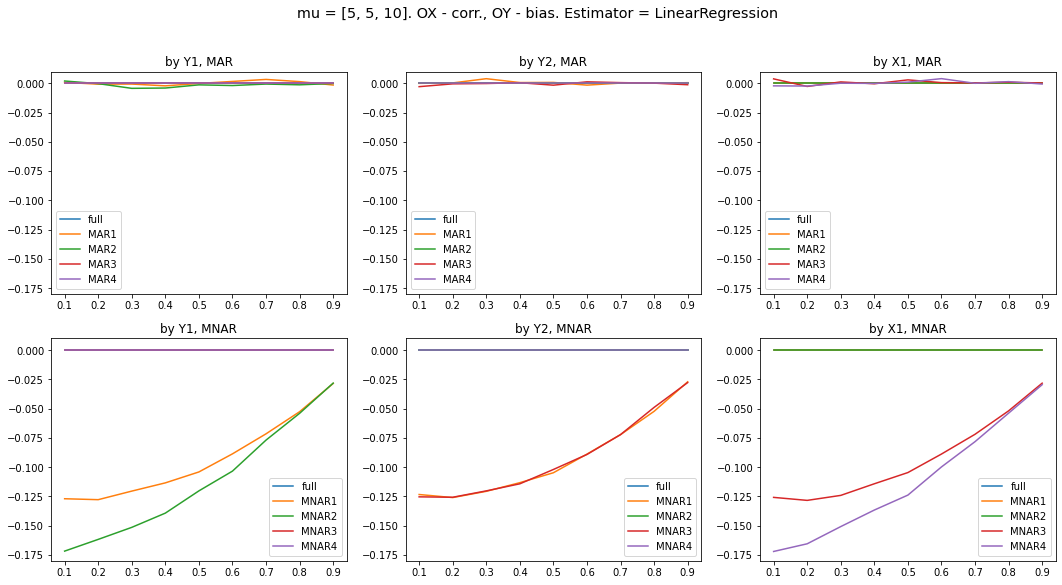

In [364]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = LinearRegression", fontsize="x-large")

mu1_icelr_MAR_Y1_100_1000.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_icelr_MNAR_Y1_100_1000.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_icelr_MAR_Y2_100_1000.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_icelr_MNAR_Y2_100_1000.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_icelr_MAR_X1_100_1000.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_icelr_MNAR_X1_100_1000.plot(ax = axes[1,2], title = "by X1, MNAR")

# MICE imputation

In [348]:
np.array([1,2,3]).mean(axis=0)

2.0

## MICE imputation (just cycle of m = 5 and then averaging)

In [36]:
def mice_imp_SIMP(mu, param, num, propor, mech, SP):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(15):

            #             X_full = data_gener_X(100, mu, cor)
#             df_means.loc[n, 'mean_full'] = X_full[:,num].mean()          
            
            dt_gener = data_gener(300, mu, cor)
            DF_dt_gener = pd.DataFrame(dt_gener, columns = ['Y1','Y2','X1'])
            X_full = StandardScaler().fit_transform(DF_dt_gener)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean()


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp_mice = []
            for m in range(4):
                imp = IterativeImputer(random_state = 0, estimator = BayesianRidge(), sample_posterior = SP).fit_transform(X_miss)
                imp_mice.append(imp[:,num].mean())
            
            df_means.loc[n, 'mean_M1'] = np.array(imp_mice).mean(axis=0)


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp_mice = []
            for m in range(4):
                imp = IterativeImputer(random_state = 0, estimator = BayesianRidge(), sample_posterior = SP).fit_transform(X_miss)
                imp_mice.append(imp[:,num].mean())
            
            df_means.loc[n, 'mean_M2'] = np.array(imp_mice).mean(axis=0)



            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp_mice = []
            for m in range(4):
                imp = IterativeImputer(random_state = n, estimator = BayesianRidge(), sample_posterior = True).fit_transform(X_miss)
                imp_mice.append(imp[:,num].mean())
            
            df_means.loc[n, 'mean_M3'] = np.array(imp_mice).mean(axis=0)



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp_mice = []
            for m in range(4):
                imp = IterativeImputer(random_state = 0, estimator = BayesianRidge(), sample_posterior = SP).fit_transform(X_miss)
                imp_mice.append(imp[:,num].mean())
            
            df_means.loc[n, 'mean_M4'] = np.array(imp_mice).mean(axis=0)


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

### est = BR, SP = False (no difference with ice on BR)

#### mu = [5, 5, 10]. сравнение затрач. времени

no max_iter, random_state - doesnt matter as SP = False:

In [316]:
%%time
mu = mu_X_1

mu1_miceSIMP_MAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MNAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

CPU times: user 8min 42s, sys: 2.88 s, total: 8min 45s
Wall time: 8min 45s


<AxesSubplot:title={'center':'by X1, MNAR'}>

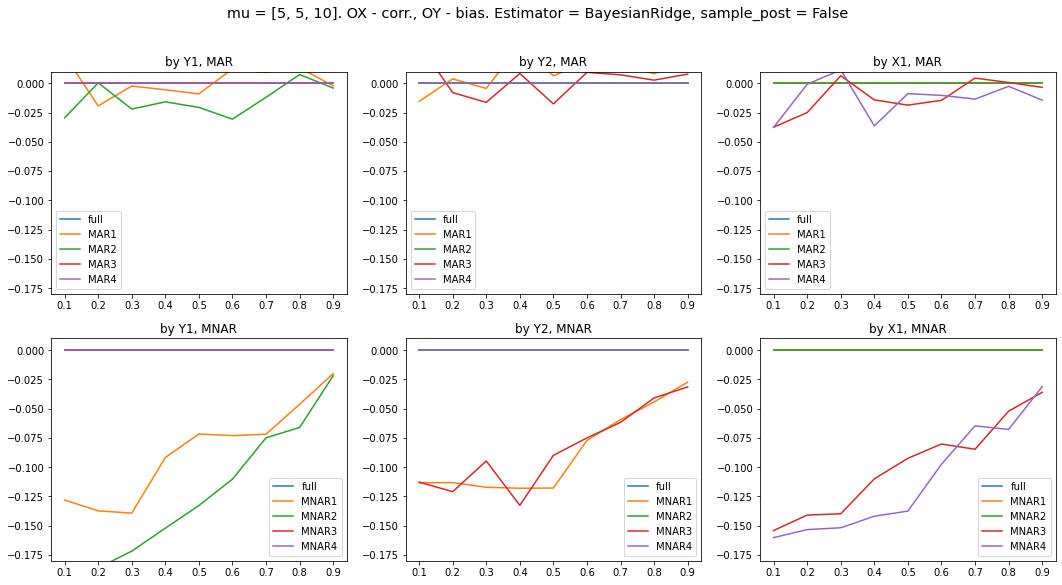

In [319]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu1_miceSIMP_MAR_Y1_15_100.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_MNAR_Y1_15_100.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_MAR_Y2_15_100.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_MNAR_Y2_15_100.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_MAR_X1_15_100.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_MNAR_X1_15_100.plot(ax = axes[1,2], title = "by X1, MNAR")

In [183]:
mu = mu_X_1

mu1_miceSIMP_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

<AxesSubplot:title={'center':'by X1, MNAR'}>

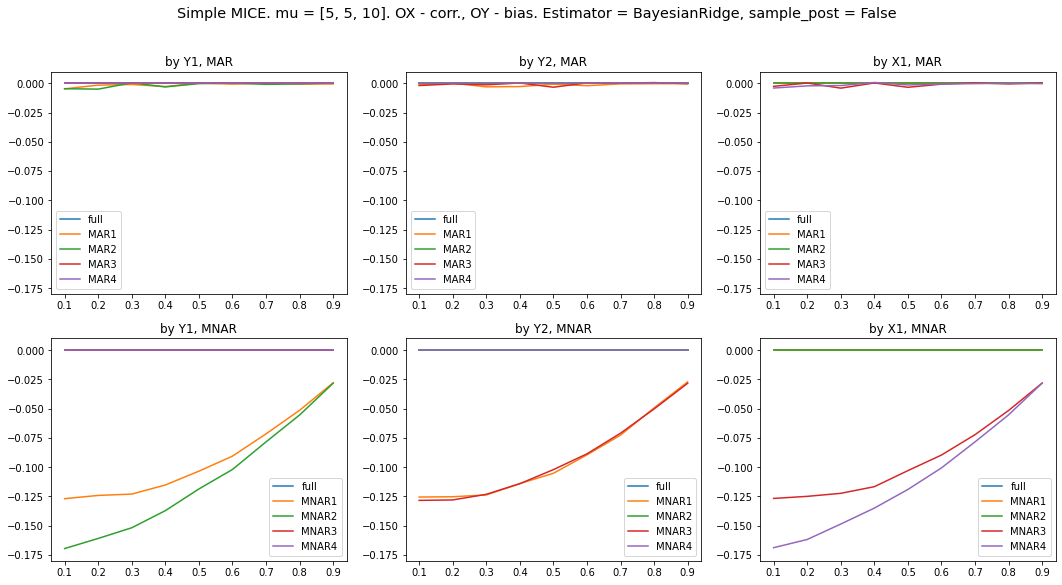

In [184]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu1_miceSIMP_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

random_state = m, matr(100), n in 0..25:

In [200]:
%%time
mu = mu_X_1

mu1_miceSIMP_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

CPU times: user 19min 55s, sys: 3.3 s, total: 19min 58s
Wall time: 27min 48s


<AxesSubplot:title={'center':'by X1, MNAR'}>

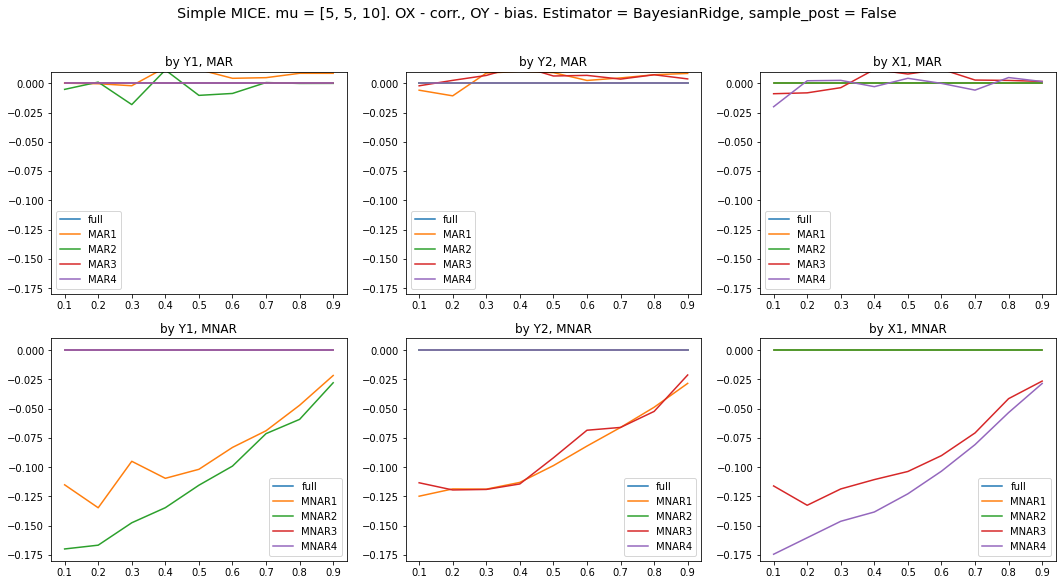

In [201]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu1_miceSIMP_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

matr(300), n in 0..15:

In [232]:
%%time
mu = mu_X_1

mu1_miceSIMP_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu1_miceSIMP_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu1_miceSIMP_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

CPU times: user 15min 9s, sys: 2.5 s, total: 15min 11s
Wall time: 15min 11s


<AxesSubplot:title={'center':'by X1, MNAR'}>

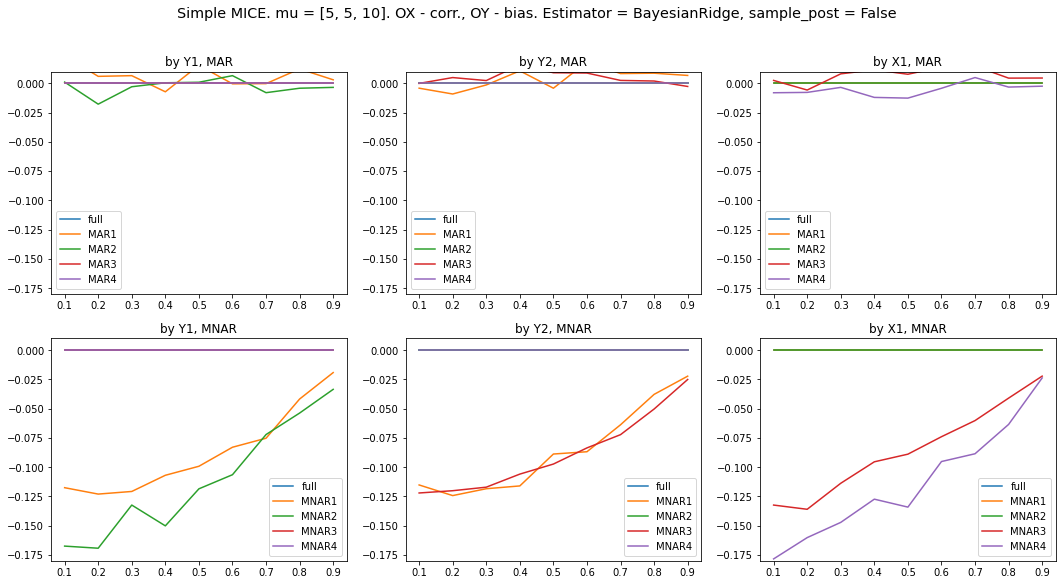

In [234]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu1_miceSIMP_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

#### mu = [1, 100, 10000]

In [350]:
%%time
mu = mu_X_2

mu2_miceSIMP_MAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MNAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

KeyboardInterrupt: 

<AxesSubplot:title={'center':'by X1, MNAR'}>

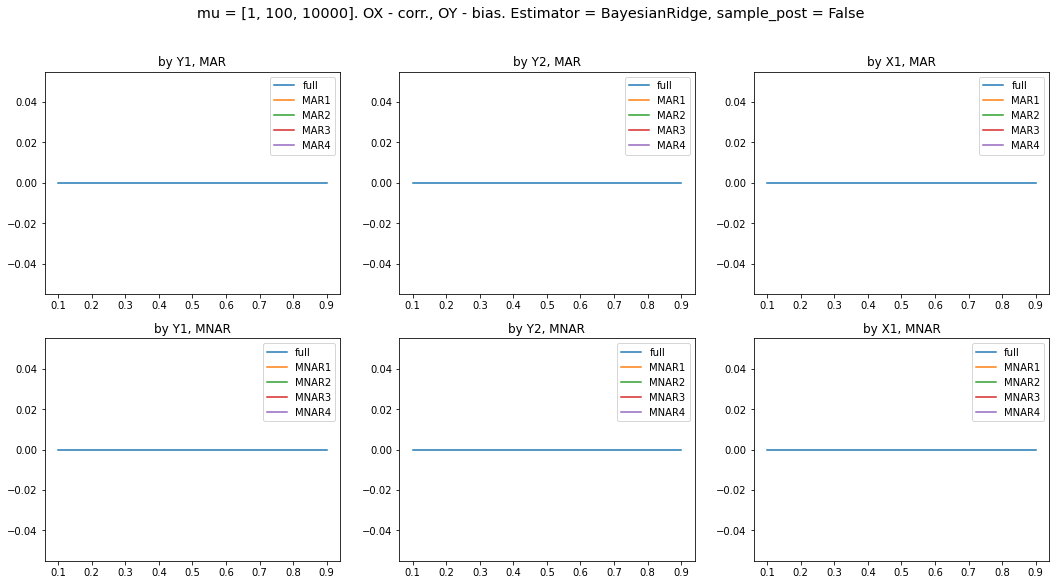

In [351]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu2_miceSIMP_MAR_Y1_15_100.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_MNAR_Y1_15_100.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_MAR_Y2_15_100.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_MNAR_Y2_15_100.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_MAR_X1_15_100.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_MNAR_X1_15_100.plot(ax = axes[1,2], title = "by X1, MNAR")

no max_iter, random_state - doesnt matter as SP = False:

In [320]:
%%time
mu = mu_X_2

mu2_miceSIMP_MAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MNAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

CPU times: user 8min 41s, sys: 2.61 s, total: 8min 43s
Wall time: 8min 44s


In [323]:
mu2_miceSIMP_MAR_Y1_15_100

full       MAR1       MAR2 MAR3 MAR4
0.1  0.0   6.405191   -0.96446  0.0  0.0
0.2  0.0   1.244911  -0.862845  0.0  0.0
0.3  0.0  13.076559  -4.415738  0.0  0.0
0.4  0.0  10.236455   5.744382  0.0  0.0
0.5  0.0   7.165345 -11.558544  0.0  0.0
0.6  0.0  21.849839  -8.505465  0.0  0.0
0.7  0.0  -3.659389  -1.367035  0.0  0.0
0.8  0.0   2.622578  -12.89623  0.0  0.0
0.9  0.0   9.049261   2.116305  0.0  0.0

<AxesSubplot:title={'center':'by X1, MNAR'}>

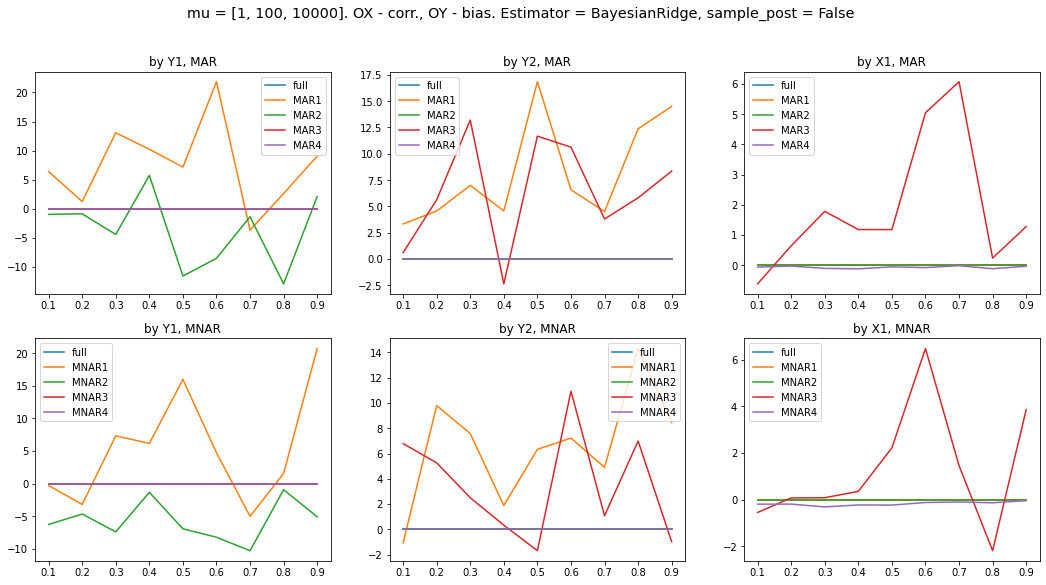

In [322]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu2_miceSIMP_MAR_Y1_15_100.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_MNAR_Y1_15_100.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_MAR_Y2_15_100.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_MNAR_Y2_15_100.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_MAR_X1_15_100.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_MNAR_X1_15_100.plot(ax = axes[1,2], title = "by X1, MNAR")

##### все очень плохо:

In [236]:
%%time
mu = mu_X_2

mu2_miceSIMP_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "False")
mu2_miceSIMP_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "False")
mu2_miceSIMP_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "False")

CPU times: user 15min 8s, sys: 2.37 s, total: 15min 10s
Wall time: 15min 10s


<AxesSubplot:title={'center':'by X1, MNAR'}>

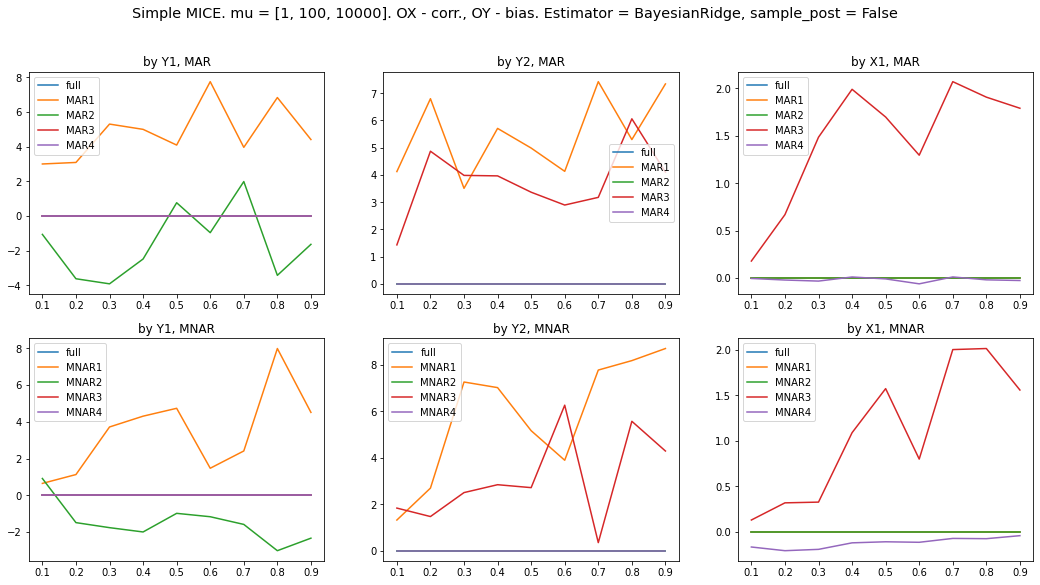

In [237]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu2_miceSIMP_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [241]:
%%time
mu = mu_X_2

mu2_miceSIMP_TR_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "True")
mu2_miceSIMP_TR_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "True")
mu2_miceSIMP_TR_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "True")

CPU times: user 1h 13min 30s, sys: 7.2 s, total: 1h 13min 37s
Wall time: 4h 50min 51s


<AxesSubplot:title={'center':'by X1, MNAR'}>

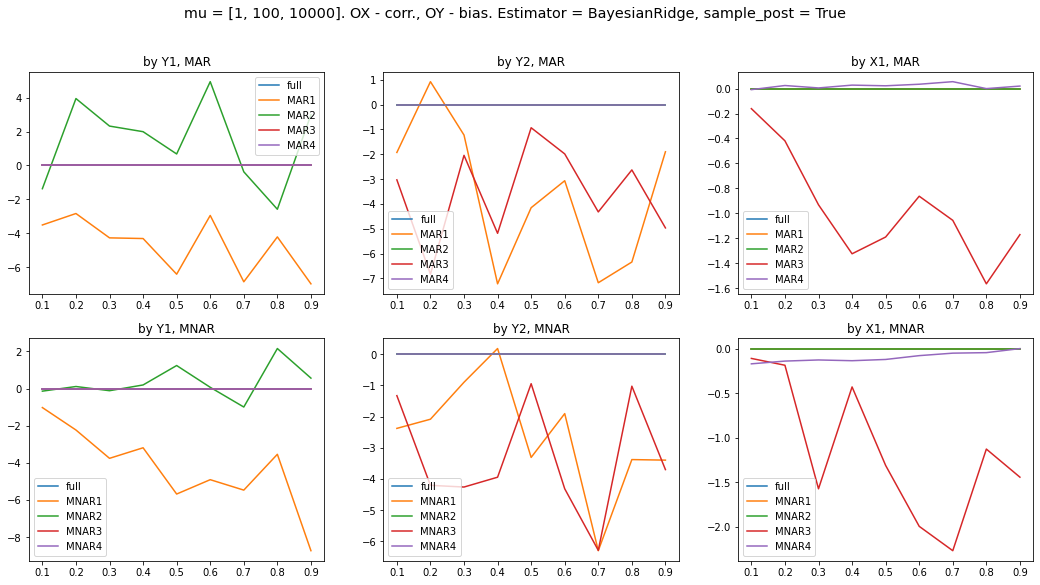

In [242]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu2_miceSIMP_TR_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [29]:
f

NameError: name 'f' is not defined

<AxesSubplot:title={'center':'by X1, MNAR'}>

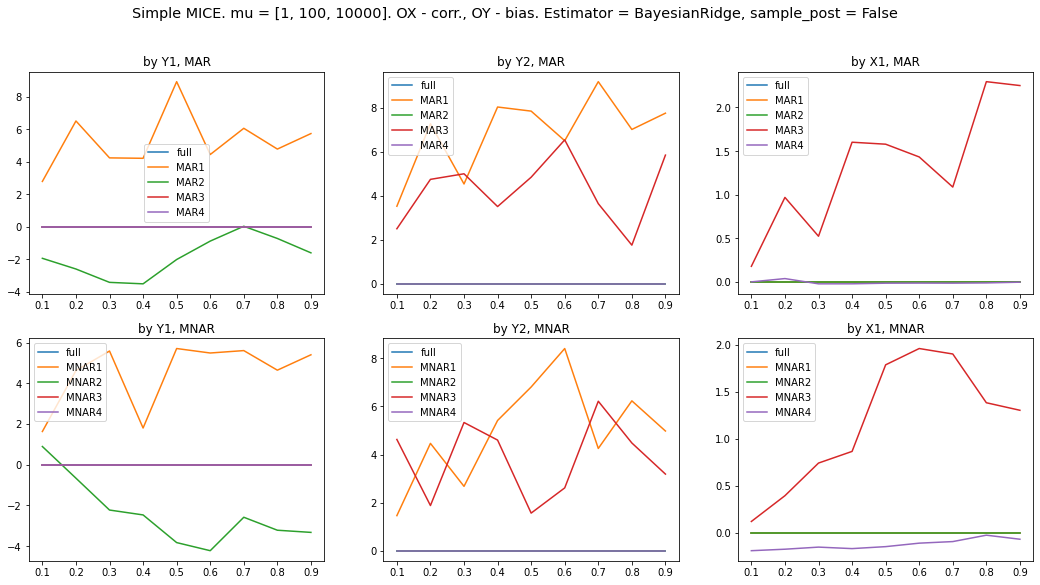

In [239]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = False", fontsize="x-large")

mu2_miceSIMP_TR_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

### estimator = BR, sample_posterior = True

Крайне! долго и тяжело считается при n 0...100 и matr(1000):

In [ ]:
mu = mu_X_1

mu1_miceSIMP_TR_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "True")

NameError: name 'mu1_miceSIMP_TR_MNAR_Y2' is not defined

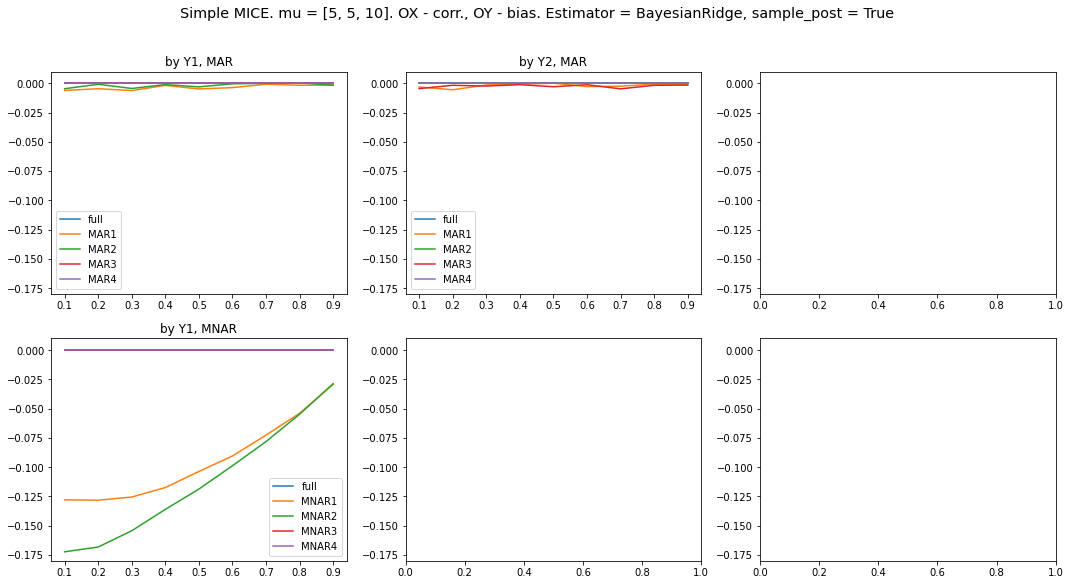

In [192]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu1_miceSIMP_TR_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_TR_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_TR_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_TR_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_TR_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_TR_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

matr(300) on 0..15:

In [207]:
%%time
mu = mu_X_1

mu2_miceSIMP_TR_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "True")
mu2_miceSIMP_TR_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "True")
mu2_miceSIMP_TR_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "True")
mu2_miceSIMP_TR_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "True")

CPU times: user 16min 31s, sys: 3.81 s, total: 16min 35s
Wall time: 16min 37s


<AxesSubplot:title={'center':'by X1, MNAR'}>

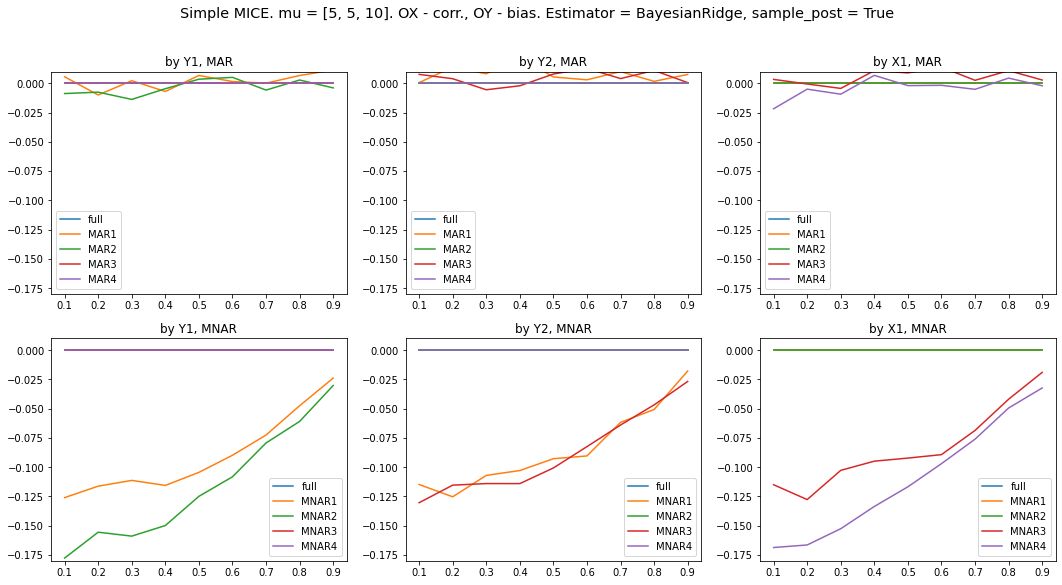

In [208]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("Simple MICE. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu2_miceSIMP_TR_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [324]:
%%time
mu = mu_X_1

mu1_miceSIMP_TR_MAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y1_15_100 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y2_15_100 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_X1_15_100 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "True")

CPU times: user 8min 21s, sys: 1.29 s, total: 8min 22s
Wall time: 8min 22s


NameError: name 'mu1_miceSIMP_TR_MAR_Y1_15_100' is not defined

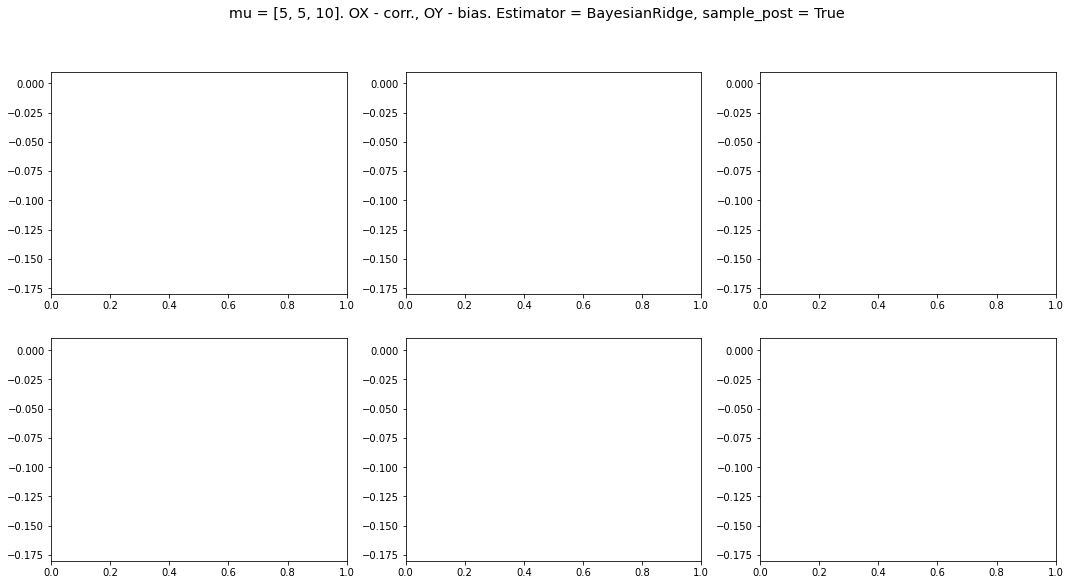

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu1_miceSIMP_TR_MAR_Y1_15_100.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_TR_MNAR_Y1_15_100.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_TR_MAR_Y2_15_100.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_TR_MNAR_Y2_15_100.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_TR_MAR_X1_15_100.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_TR_MNAR_X1_15_100.plot(ax = axes[1,2], title = "by X1, MNAR")

#### mu = [1, 100, 10000]

prop = 0.4

In [37]:
%%time
mu = mu_X_2

mu2_miceSIMP_TR_MAR_Y1_15_300 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.4, mech = "MAR", SP = True)
mu2_miceSIMP_TR_MAR_Y2_15_300 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.4, mech = "MAR", SP = True)
mu2_miceSIMP_TR_MAR_X1_15_300 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.4, mech = "MAR", SP = True)
mu2_miceSIMP_TR_MNAR_Y1_15_300 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.4, mech = "MNAR", SP = True)
mu2_miceSIMP_TR_MNAR_Y2_15_300 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.4, mech = "MNAR", SP = True)
mu2_miceSIMP_TR_MNAR_X1_15_300 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.4, mech = "MNAR", SP = True)

CPU times: user 25min 43s, sys: 7.36 s, total: 25min 50s
Wall time: 25min 49s


<AxesSubplot:title={'center':'by X1, MNAR'}>

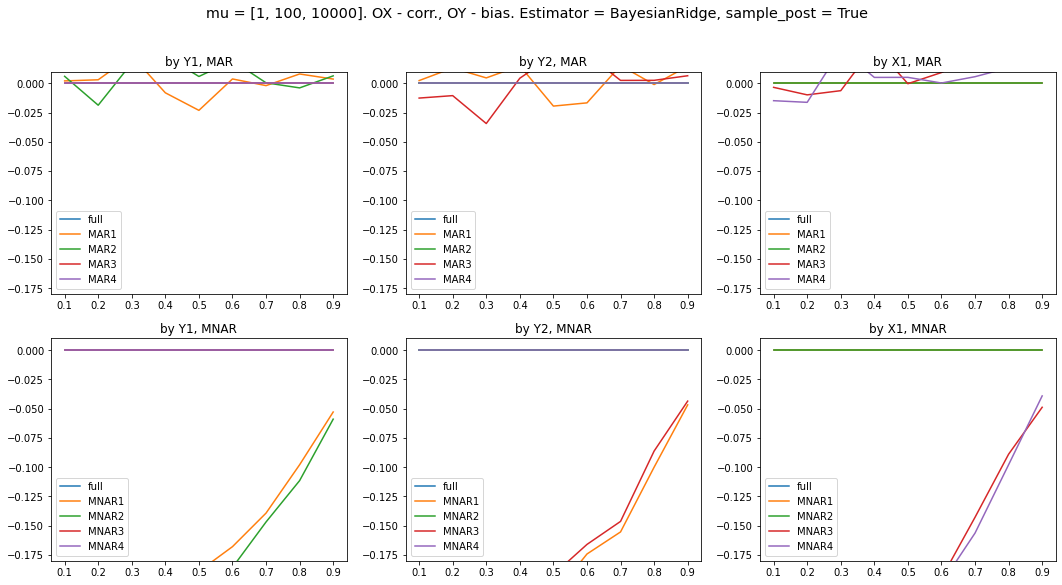

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu2_miceSIMP_TR_MAR_Y1_15_300.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MNAR_Y1_15_300.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MAR_Y2_15_300.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MNAR_Y2_15_300.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MAR_X1_15_300.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MNAR_X1_15_300.plot(ax = axes[1,2], title = "by X1, MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

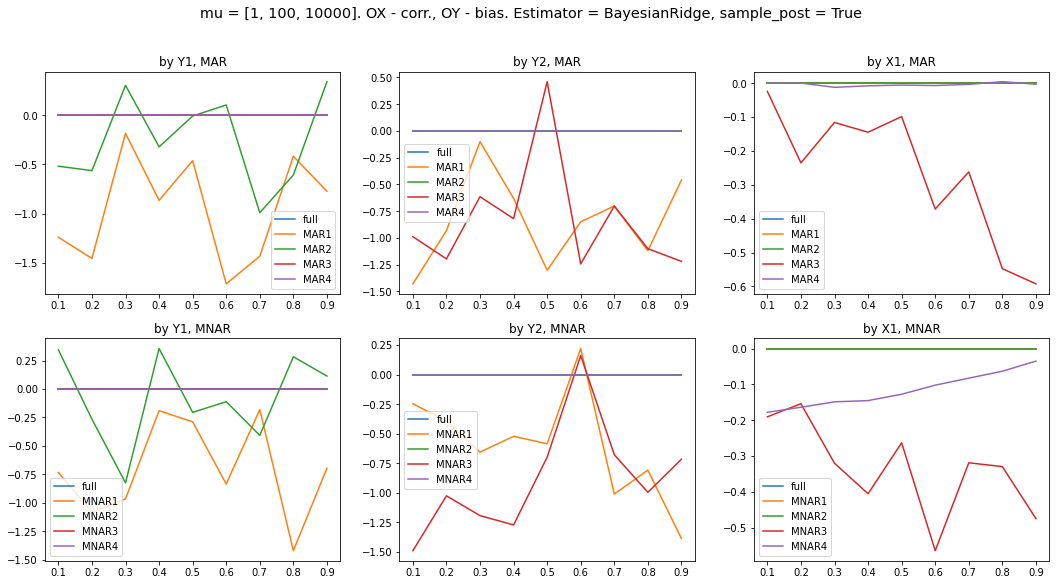

In [332]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
# [ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 10000]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu2_miceSIMP_TR_MAR_Y1_15_1000.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MNAR_Y1_15_1000.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MAR_Y2_15_1000.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MNAR_Y2_15_1000.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MAR_X1_15_1000.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MNAR_X1_15_1000.plot(ax = axes[1,2], title = "by X1, MNAR")

Comparison:

<AxesSubplot:title={'center':'by X1, MNAR'}>

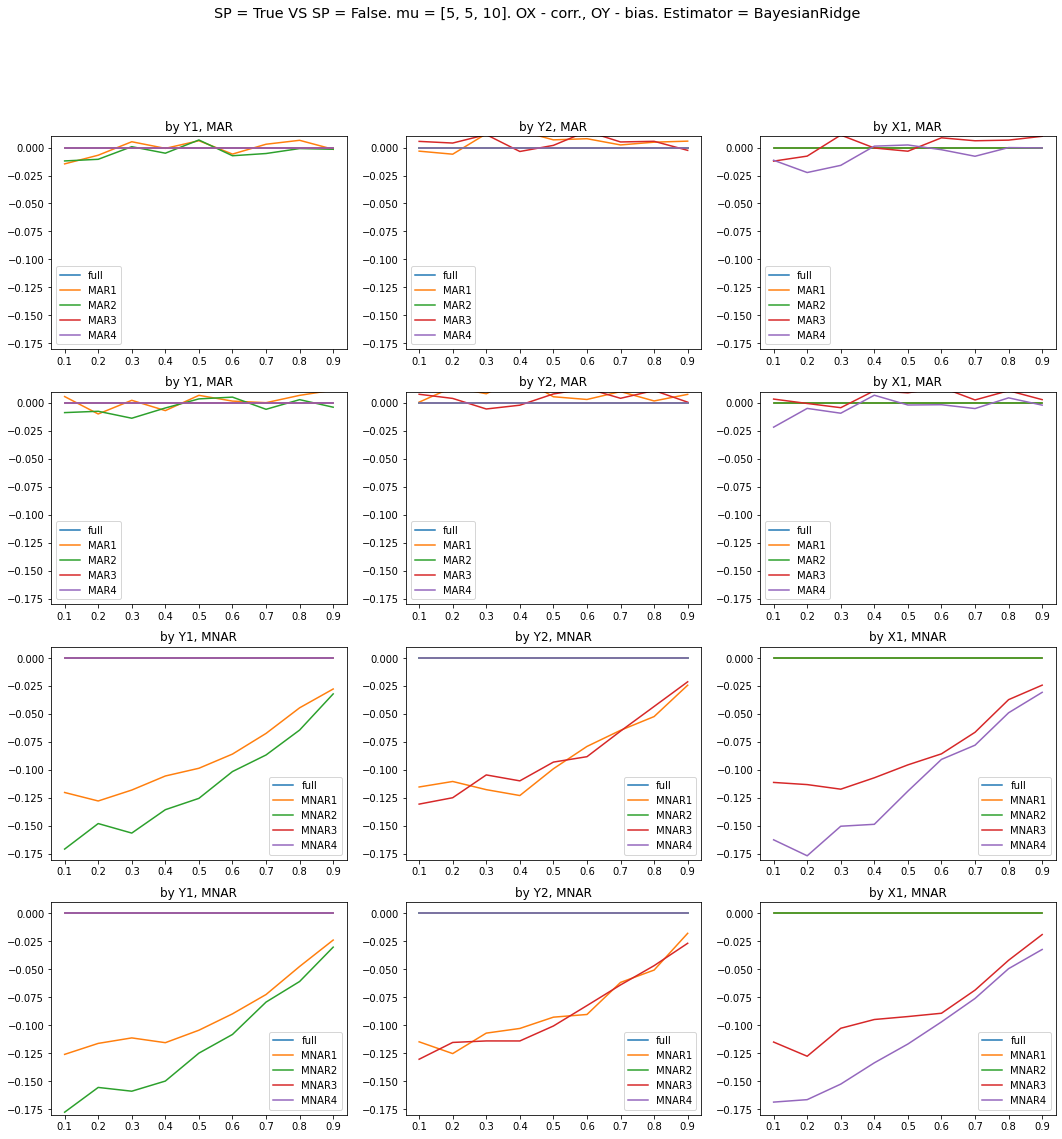

In [216]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6*3,6 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("SP = True VS SP = False. mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge", fontsize="x-large")

mu1_miceSIMP_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu2_miceSIMP_TR_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, MAR")
mu1_miceSIMP_MNAR_Y1.plot(ax = axes[2,0], title = "by Y1, MNAR")
mu2_miceSIMP_TR_MNAR_Y1.plot(ax = axes[3,0], title = "by Y1, MNAR")
mu1_miceSIMP_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu2_miceSIMP_TR_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, MAR")
mu1_miceSIMP_MNAR_Y2.plot(ax = axes[2,1], title = "by Y2, MNAR")
mu2_miceSIMP_TR_MNAR_Y2.plot(ax = axes[3,1], title = "by Y2, MNAR")
mu1_miceSIMP_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu2_miceSIMP_TR_MAR_X1.plot(ax = axes[1,2], title = "by X1, MAR")
mu1_miceSIMP_MNAR_X1.plot(ax = axes[2,2], title = "by X1, MNAR")
mu2_miceSIMP_TR_MNAR_X1.plot(ax = axes[3,2], title = "by X1, MNAR")

In [243]:
%%time
mu = mu_X_1

mu1_miceSIMP_TR_MAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y1 = mice_imp_SIMP(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_Y2 = mice_imp_SIMP(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR", SP = "True")
mu1_miceSIMP_TR_MNAR_X1 = mice_imp_SIMP(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR", SP = "True")

CPU times: user 1h 16min 6s, sys: 15 s, total: 1h 16min 21s
Wall time: 1h 42min 18s


<AxesSubplot:title={'center':'by X1, MNAR'}>

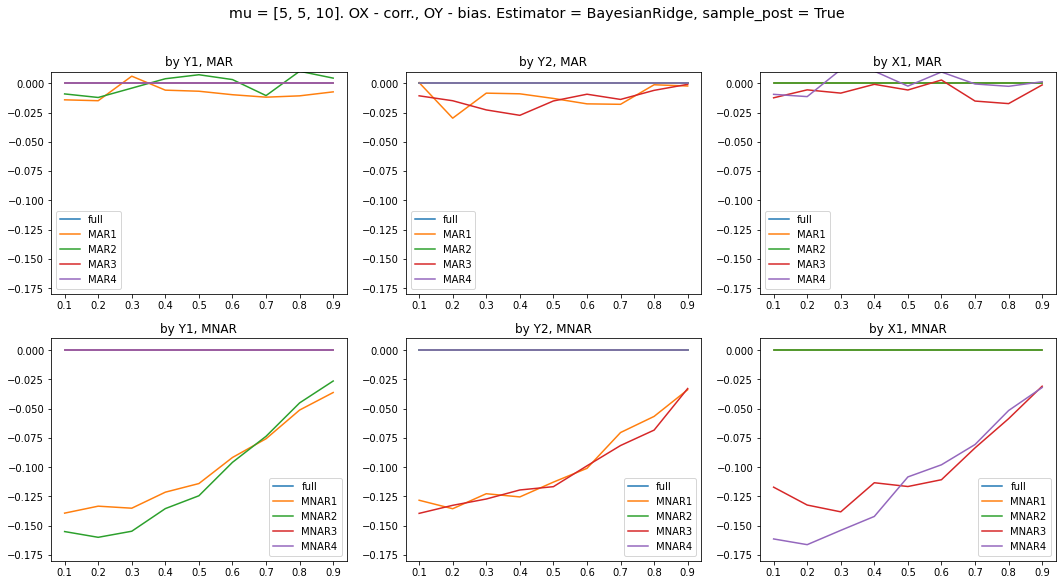

In [307]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. OX - corr., OY - bias. Estimator = BayesianRidge, sample_post = True", fontsize="x-large")

mu1_miceSIMP_TR_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu1_miceSIMP_TR_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu1_miceSIMP_TR_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu1_miceSIMP_TR_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu1_miceSIMP_TR_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu1_miceSIMP_TR_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

In [331]:
from scipy.stats import sem
import math

In [15]:
def squer_sum(lst):
    sum = 0
    for i in lst:
        sum = sum + (i*i)
    return sum

In [77]:
a = data_gener(100, mu1, 0.2)
aa = pd.DataFrame(a)
aa[1]

0     6.355686
1     6.045653
2     4.881556
3     5.869963
4     5.241578
        ...   
95    5.422095
96    4.904839
97    4.033033
98    4.853054
99    5.864023
Name: 1, Length: 100, dtype: float64

In [79]:
def variance_model_coef(y_true, y_pred, X):
    """Calculates variance of the coefficients."""
    residual_sum_squares = np.sum((y_true - y_pred) ** 2)
    residual_mean_square = residual_sum_squares / (len(y_true) - 2)
    return residual_mean_square / (X ** 2).sum(axis=0)

In [158]:
def rubins_pooling_rules(m_coefs, m_vars_coefs):
    """Applies Rubin's pooling rules.
    The final weights is defined as the mean of the weights across the imputed
    datasets while the total variance is defined as the combination of the mean
    of the variance of the weights and the variance of the coefficients.
    Parameters
    ----------
    m_coefs : ndarray, shape (n_imputations, n_features)
        The weights of the model fitted on each imputed dataset.
    m_vars_coefs : ndarray, shape (n_imputations, n_features)
        An estimate of the variance of the weights on each imputed dataset.
    Returns
    -------
    mean_coefs : ndarray, shape (n_features,)
        The mean coefficients computed across the imputed datasets.
    total_var_coefs : ndarray, shape (n_features,)
        An estimate of the total variation of the weights across the imputed
        datasets.
    """
    mean_coefs = np.mean(m_coefs, axis=0)
    mean_vars_coefs = np.mean(m_vars_coefs, axis=0)
    vars_coefs = np.var(m_coefs, axis=0, ddof=1)
    total_var_coefs = mean_vars_coefs + (1 + 1 / vars_coefs.shape[0]) * vars_coefs
    return mean_coefs, total_var_coefs

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LinearRegression

In [157]:
mu = mu3
cor = 0.3
mech = "MAR"
propor = 0.3

X_full, y_full = data_gener(100, mu1, cor)
# y_full = X_full[:,2]
# X_full = X_full[:,0:1]
# #     X = X_cont[:,0:2]
# #     y = X_cont[:,3]

ma = MultivariateAmputation(
    patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
    prop = propor
)
X_miss = ma.fit_transform(X_full)


test_size = 0.2
n_imputations = 5

m_coefs = []
m_vars = []
for i in range(n_imputations):
    imp = IterativeImputer(max_iter = 50, random_state = i, sample_posterior = True, estimator = BayesianRidge()).fit_transform(X_miss)
    X_train, X_test, y_train, y_test = train_test_split(imp, y_full,  test_size=test_size, random_state=42)

    clf = LinearRegression()#BayesianRidge()
    clf.fit(X_train, y_train)

    y_pred = clf.score(X_test, y_test)
    m_coef, m_var = clf.coef_, variance_model_coef(y_train, y_pred, imp)
    m_coefs.append(m_coef)
    m_vars.append(m_var)
m_coefs = np.array(m_coefs)
m_vars = np.array(m_vars)

In [159]:
print("Result of the pooling by Rubin's rules: ", rubins_pooling_rules(m_coefs, m_vars))

Result of the pooling by Rubin's rules:  (array([ 0.1245266 , -0.03603682,  0.23938262]), array([0.04514749, 0.04302014, 0.03879147]))


In [219]:
pd.DataFrame(X_miss)

0         1         2
0        NaN       NaN  4.366812
1   5.520674  4.616867  5.986775
2        NaN       NaN  5.119199
3        NaN       NaN  5.556633
4   4.962101  4.953778  5.616020
..       ...       ...       ...
95  4.714848  5.333270  6.356800
96       NaN       NaN  7.476659
97  6.054445  5.528171  4.067082
98  4.304977  5.788026  5.790407
99  4.091632  2.557456  6.313234

[100 rows x 3 columns]

In [76]:
def mice_imp(mu, param, num, propor, mech):
    
    mice_m = 4
    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(100, mu, cor)
            y_full = X_full[:,2]
            X_full = X_full[:,0:1]
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            
#             imp_means = []
#             imp_v_W = []
#             for m in range(mice_m):
#                 imp = IterativeImputer(max_iter=10, random_state = m, estimator = BayesianRidge(), sample_posterior=True).fit_transform(X_miss)
#                 imp_means.append(imp[:,num].mean())
#                 imp_v_W.append(sem(imp[:,num]))
                
            
#             mice_mean = np.array(imp_means).mean(axis=0) 
#             mice_v_W = squer_sum(imp_v_W) / mice_m
#             mice_v_B = squer_sum([x - mice_mean for x in imp_means]) / (mice_m - 1)
#             mice_V = mice_v_W + (1 + 1 / mice_m) * mice_v_B
        
#             df_means.loc[n, 'mean_M1'] = math.sqrt(mice_V)

            test_size = 0.2
            n_imputations = 5
            
            m_coefs = []
            m_vars = []
            for i in range(n_imputations):
                imp = IterativeImputer(max_iter = 50, random_state = i, sample_posterior = True, estimator = BayesianRidge()).fit_transform(X_miss)
                X_train, X_test, y_train, y_test = train_test_split(imp, y_full,  test_size=test_size, random_state=42)
                
                clf = LinearRegression()#BayesianRidge()
                clf.fit(X_train, y_train)
                
                y_pred = clf.score(X_test, y_test)
                m_coef, m_var = clf.coef_, variance_model_coef(y_train, y_pred, imp)
                m_coefs.append(m_coef)
                m_vars.append(m_var)
            m_coefs = np.array(m_coefs)
            m_vars = np.array(m_vars)


# test_size = 0.2
# p_miss=0.3
# p_obs=0.5
# mecha = 'MAR'

# X_full, y_full = X_full, y_full = load_diabetes(return_X_y=True, as_frame=True)
# X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,  test_size=test_size,random_state=42)
# X_miss, mask = amputation.ampute(X_full, p_miss, p_mech, vars_observed=[0, 2], score_func='SIGMOID-TAIL',frame=True)



            
#             #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

#             ma = MultivariateAmputation(
#                 patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
#                 prop = propor
#             )
#             X_miss = ma.fit_transform(X_full)

#             imp_means = []
#             imp_v_W = []
#             for m in range(mice_m):
#                 imp = IterativeImputer(max_iter=10, random_state = m, estimator = BayesianRidge(), sample_posterior=True).fit_transform(X_miss)
#                 imp_means.append(imp[:,num].mean())
#                 imp_v_W.append(sem(imp[:,num]))
                
            
#             mice_mean = np.array(imp_means).mean(axis=0) 
#             mice_v_W = squer_sum(imp_v_W) / mice_m
#             mice_v_B = squer_sum([x - mice_mean for x in imp_means]) / (mice_m - 1)
#             mice_V = mice_v_W + (1 + 1 / mice_m) * mice_v_B
        
#             df_means.loc[n, 'mean_M2'] = math.sqrt(mice_V)
            
            




#             #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

#             ma = MultivariateAmputation(
#                 patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
#                 prop = propor
#             )
#             X_miss = ma.fit_transform(X_full)

#             imp_means = []
#             imp_v_W = []
#             for m in range(mice_m):
#                 imp = IterativeImputer(max_iter=10, random_state = m, estimator = BayesianRidge(), sample_posterior=True).fit_transform(X_miss)
#                 imp_means.append(imp[:,num].mean())
#                 imp_v_W.append(sem(imp[:,num]))
                
            
#             mice_mean = np.array(imp_means).mean(axis=0) 
#             mice_v_W = squer_sum(imp_v_W) / mice_m
#             mice_v_B = squer_sum([x - mice_mean for x in imp_means]) / (mice_m - 1)
#             mice_V = mice_v_W + (1 + 1 / mice_m) * mice_v_B
        
#             df_means.loc[n, 'mean_M3'] = math.sqrt(mice_V)



            
#             #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

#             ma = MultivariateAmputation(
#                 patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
#                 prop = propor
#             )
#             X_miss = ma.fit_transform(X_full)

#             imp_means = []
#             imp_v_W = []
#             for m in range(mice_m):
#                 imp = IterativeImputer(max_iter=10, random_state = m, estimator = BayesianRidge(), sample_posterior=True).fit_transform(X_miss)
#                 imp_means.append(imp[:,num].mean())
#                 imp_v_W.append(sem(imp[:,num]))
                
            
#             mice_mean = np.array(imp_means).mean(axis=0) 
#             mice_v_W = squer_sum(imp_v_W) / mice_m
#             mice_v_B = squer_sum([x - mice_mean for x in imp_means]) / (mice_m - 1)
#             mice_V = mice_v_W + (1 + 1 / mice_m) * mice_v_B
        
#             df_means.loc[n, 'mean_M4'] = math.sqrt(mice_V)


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [51]:
mu = mu3

mu3_mice_MAR_Y1 = mice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mu3_mice_MAR_Y2 = mice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mu3_mice_MAR_X1 = mice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
# mu3_mice_MNAR_Y1 = mice_imp(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
# mu3_mice_MNAR_Y2 = mice_imp(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
# mu3_mice_MNAR_X1 = mice_imp(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

In [56]:
mu3_mice_MAR_Y1

full           MAR1 MAR2 MAR3      MAR4
0.1  0.0  395720.912498  NaN  NaN -0.907837
0.2  0.0  560953.021687  NaN  NaN -0.900916
0.3  0.0  673150.910683  NaN  NaN -0.897696
0.4  0.0  724106.599739  NaN  NaN -0.907981
0.5  0.0  744683.469041  NaN  NaN -0.894145
0.6  0.0  776221.284701  NaN  NaN -0.902564
0.7  0.0  749753.145259  NaN  NaN -0.891921
0.8  0.0  726083.730084  NaN  NaN -0.905803
0.9  0.0    713199.1404  NaN  NaN -0.885425

In [57]:
mu3_mice_MAR_Y2

full           MAR1 MAR2 MAR3         MAR4
0.1  0.0  331283.394719  NaN  NaN -9999.897928
0.2  0.0  568090.852251  NaN  NaN -9999.900367
0.3  0.0  643209.299506  NaN  NaN -9999.913261
0.4  0.0  694957.835533  NaN  NaN -9999.884976
0.5  0.0   701639.99883  NaN  NaN -9999.889246
0.6  0.0  703884.604614  NaN  NaN -9999.898026
0.7  0.0  697210.642555  NaN  NaN -9999.875563
0.8  0.0  691840.024235  NaN  NaN -9999.884863
0.9  0.0  664704.902847  NaN  NaN  -9999.89324

<AxesSubplot:title={'center':'by X1, MAR'}>

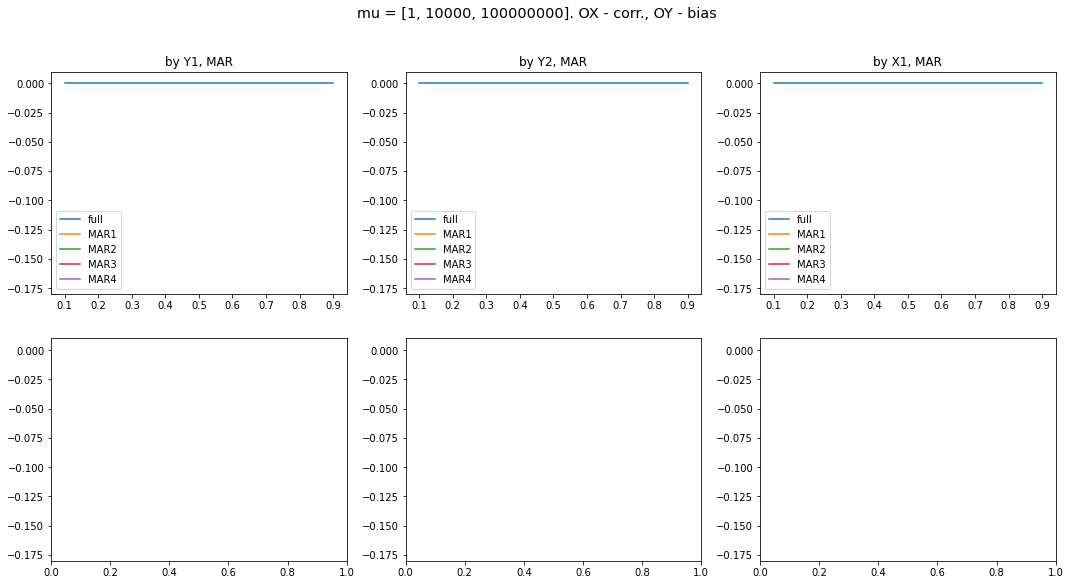

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_mice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
# mu3_mice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_mice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
# mu3_mice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_mice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
# mu3_mice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

## differ random_state

In [7]:
def mice_imp_rand(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(estimator = BayesianRidge()
                                   , random_state = 42, sample_posterior = True).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(estimator = BayesianRidge()
                                  , random_state = 42, sample_posterior = True).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(estimator = BayesianRidge()
                                  , random_state = 42, sample_posterior = True).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(estimator = BayesianRidge()
                                   , random_state = 42, sample_posterior = True).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [2]:
# mu = mu3

# mu3_miceRand_MAR_Y1 = mice_imp_rand(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
# mu3_miceRand_MAR_Y2 = mice_imp_rand(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
# mu3_miceRand_MAR_X1 = mice_imp_rand(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
# mu3_miceRand_MNAR_Y1 = mice_imp_rand(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
# mu3_miceRand_MNAR_Y2 = mice_imp_rand(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
# mu3_miceRand_MNAR_X1 = mice_imp_rand(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_miceRand_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_miceRand_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_miceRand_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_miceRand_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_miceRand_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_miceRand_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

## MICE with random forest regressor

In [3]:
randForEstimator = RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    )

def mice_imp_RandFor(mu, param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, mu, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = randForEstimator).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = randForEstimator).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = randForEstimator).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = randForEstimator).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [1]:
# mu = mu1

# mu1_miceRand_MAR_Y1 = mice_imp_RandFor(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MAR")
# mu1_miceRand_MAR_Y2 = mice_imp_RandFor(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MAR")
# mu1_miceRand_MAR_X1 = mice_imp_RandFor(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MAR")
# # mu1_miceRand_MNAR_Y1 = mice_imp_RandFor(mu = mu, param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
# mu1_miceRand_MNAR_Y2 = mice_imp_RandFor(mu = mu, param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
# mu1_miceRand_MNAR_X1 = mice_imp_RandFor(mu = mu, param = "X1", num = 2, propor = 0.2, mech = "MNAR")

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 10000, 100000000]. OX - corr., OY - bias", fontsize="x-large")

mu3_mice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
mu3_mice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mu3_mice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mu3_mice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mu3_mice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mu3_mice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

# Comparison: cc, mean, regr, mice

Here cc calculates mean after dropping lines witn mis. values. 'mean' calculates mean of each column without noticing mis. values.

# mu = [5, 5, 10]

## MAR

<AxesSubplot:title={'center':'by X1, mice'}>

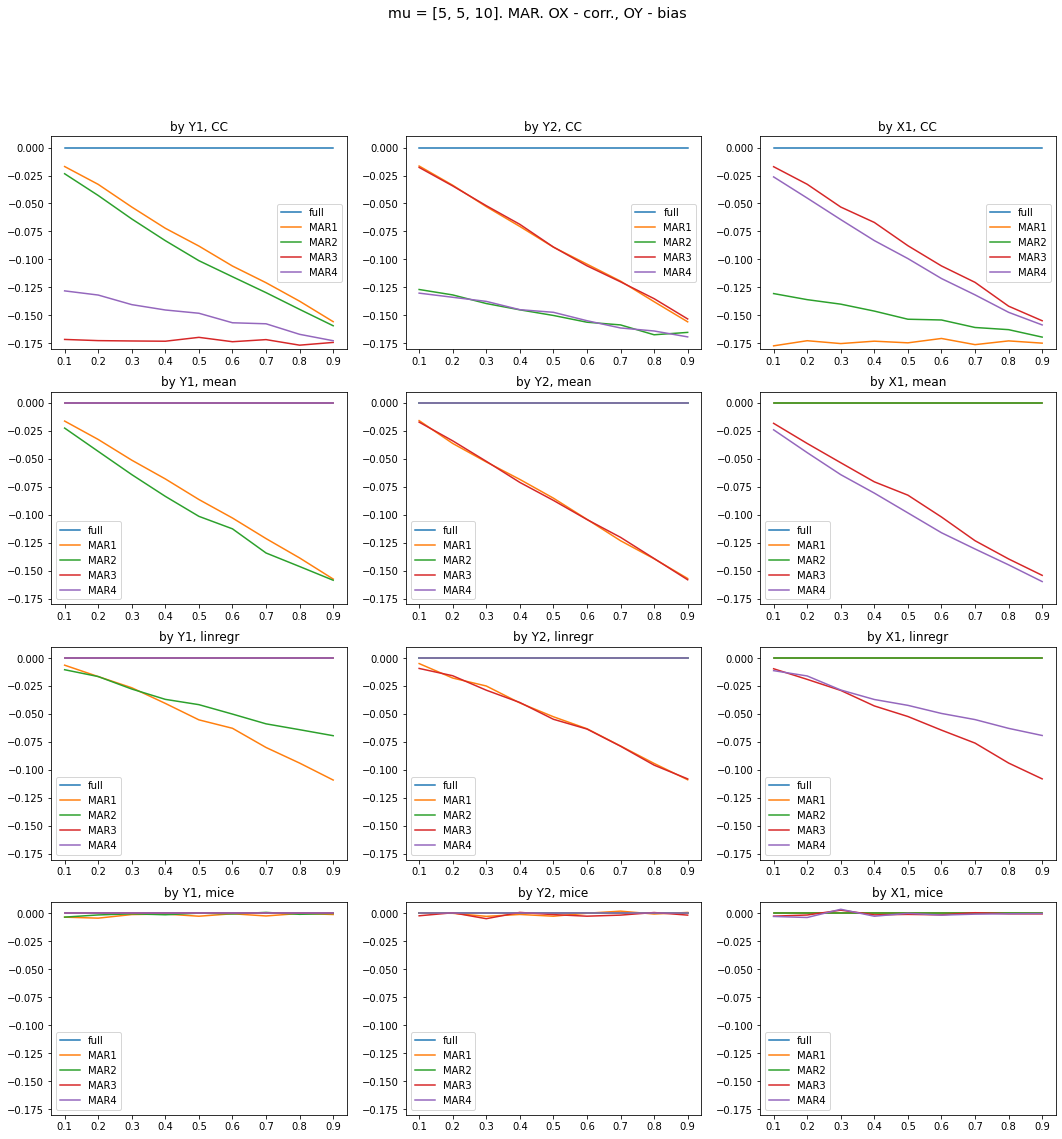

In [70]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6*3,6 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. MAR. OX - corr., OY - bias", fontsize="x-large")

meanCC_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, CC")
meanCC_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, CC")
meanCC_MAR_X1.plot(ax = axes[0,2], title = "by X1, CC")

meanNA_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, mean")
meanNA_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, mean")
meanNA_MAR_X1.plot(ax = axes[1,2], title = "by X1, mean")

regr_MAR_Y1.plot(ax = axes[2,0], title = "by Y1, linregr")
regr_MAR_Y2.plot(ax = axes[2,1], title = "by Y2, linregr")
regr_MAR_X1.plot(ax = axes[2,2], title = "by X1, linregr")

mu1_mice_MAR_Y1.plot(ax = axes[3,0], title = "by Y1, mice")
mu1_mice_MAR_Y2.plot(ax = axes[3,1], title = "by Y2, mice")
mu1_mice_MAR_X1.plot(ax = axes[3,2], title = "by X1, mice")

# plt.savefig('MAR.pdf')

## MNAR

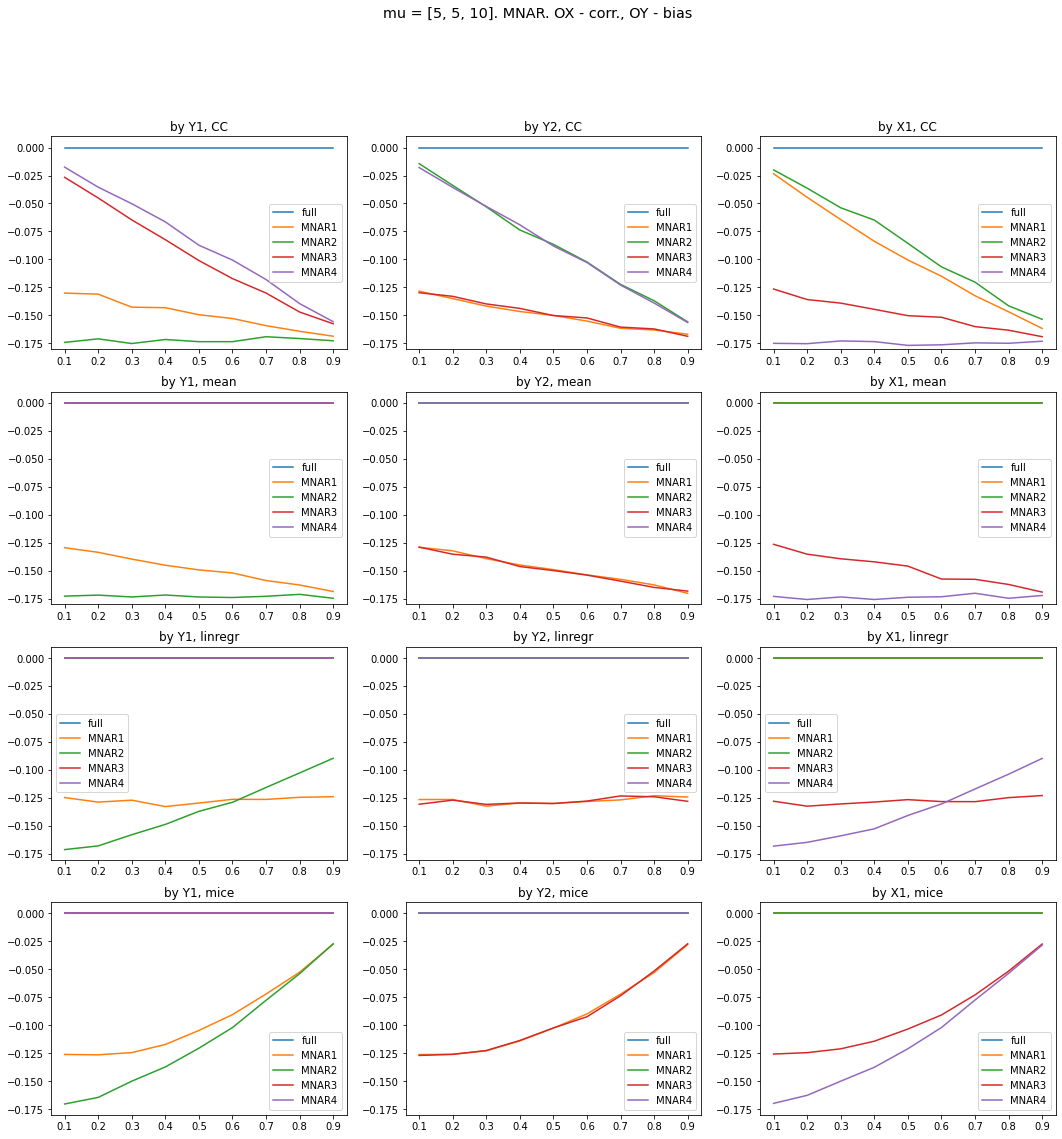

In [72]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6*3,6 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [5, 5, 10]. MNAR. OX - corr., OY - bias", fontsize="x-large")


meanCC_MNAR_Y1.plot(ax = axes[0,0], title = "by Y1, CC")
meanCC_MNAR_Y2.plot(ax = axes[0,1], title = "by Y2, CC")
meanCC_MNAR_X1.plot(ax = axes[0,2], title = "by X1, CC")

meanNA_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, mean")
meanNA_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, mean")
meanNA_MNAR_X1.plot(ax = axes[1,2], title = "by X1, mean")

regr_MNAR_Y1.plot(ax = axes[2,0], title = "by Y1, linregr")
regr_MNAR_Y2.plot(ax = axes[2,1], title = "by Y2, linregr")
regr_MNAR_X1.plot(ax = axes[2,2], title = "by X1, linregr")

mu1_mice_MNAR_Y1.plot(ax = axes[3,0], title = "by Y1, mice")
mu1_mice_MNAR_Y2.plot(ax = axes[3,1], title = "by Y2, mice")
mu1_mice_MNAR_X1.plot(ax = axes[3,2], title = "by X1, mice")

plt.savefig('MNAR.pdf')

# mu = [1, 100, 10000]

## MAR

<AxesSubplot:title={'center':'by X1, mice'}>

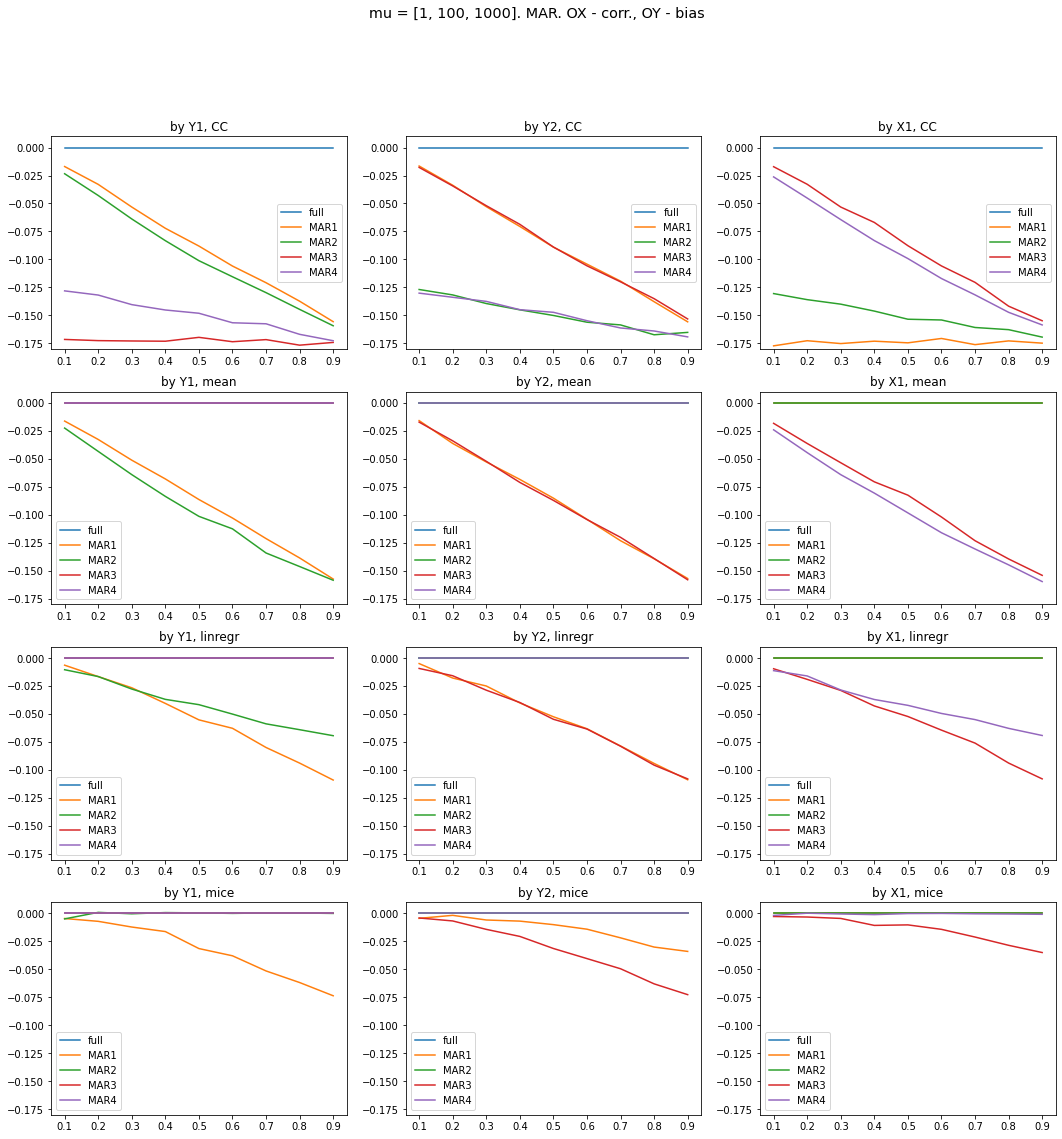

In [73]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6*3,6 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 1000]. MAR. OX - corr., OY - bias", fontsize="x-large")

meanCC_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, CC")
meanCC_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, CC")
meanCC_MAR_X1.plot(ax = axes[0,2], title = "by X1, CC")

meanNA_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, mean")
meanNA_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, mean")
meanNA_MAR_X1.plot(ax = axes[1,2], title = "by X1, mean")

regr_MAR_Y1.plot(ax = axes[2,0], title = "by Y1, linregr")
regr_MAR_Y2.plot(ax = axes[2,1], title = "by Y2, linregr")
regr_MAR_X1.plot(ax = axes[2,2], title = "by X1, linregr")

mu2_mice_MAR_Y1.plot(ax = axes[3,0], title = "by Y1, mice")
mu2_mice_MAR_Y2.plot(ax = axes[3,1], title = "by Y2, mice")
mu2_mice_MAR_X1.plot(ax = axes[3,2], title = "by X1, mice")

# plt.savefig('MAR.pdf')

## MNAR

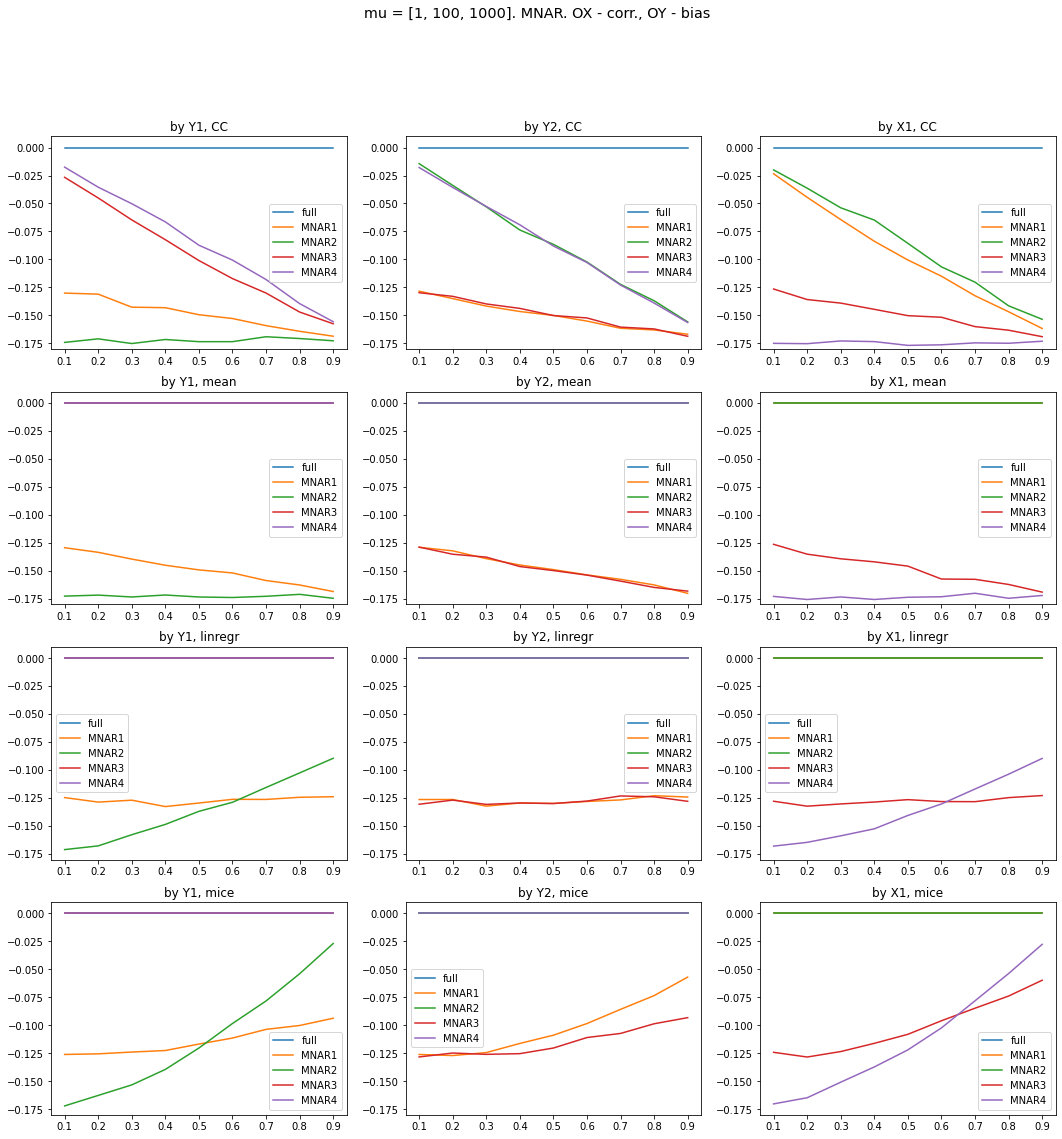

In [74]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize=(6*3,6 * 3))
[ax.set_ylim([-0.18, 0.01]) for ax in axes.flatten()]
fig.suptitle("mu = [1, 100, 1000]. MNAR. OX - corr., OY - bias", fontsize="x-large")


meanCC_MNAR_Y1.plot(ax = axes[0,0], title = "by Y1, CC")
meanCC_MNAR_Y2.plot(ax = axes[0,1], title = "by Y2, CC")
meanCC_MNAR_X1.plot(ax = axes[0,2], title = "by X1, CC")

meanNA_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, mean")
meanNA_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, mean")
meanNA_MNAR_X1.plot(ax = axes[1,2], title = "by X1, mean")

regr_MNAR_Y1.plot(ax = axes[2,0], title = "by Y1, linregr")
regr_MNAR_Y2.plot(ax = axes[2,1], title = "by Y2, linregr")
regr_MNAR_X1.plot(ax = axes[2,2], title = "by X1, linregr")

mu2_mice_MNAR_Y1.plot(ax = axes[3,0], title = "by Y1, mice")
mu2_mice_MNAR_Y2.plot(ax = axes[3,1], title = "by Y2, mice")
mu2_mice_MNAR_X1.plot(ax = axes[3,2], title = "by X1, mice")

plt.savefig('MNAR.pdf')